In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import rc

import warnings
warnings.filterwarnings(action='ignore')

mpl.rcParams['axes.unicode_minus'] = False
font_path = 'C:/jupyter_home/font/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [2]:
month_air_quality = []
for i in range(12) :
    month_air_quality.append(pd.read_excel('C:/jupyter_home/data/finedust/'+str(i+1)+'월.xls'))
    month_air_quality[i] = month_air_quality[i].drop([month_air_quality[i].index[0]])

In [3]:
month_air_quality[0]

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스
1,01-01-01,24,19,0.002,0.036,0.5,0.003
2,01-01-02,25,21,0.001,0.039,0.6,0.003
3,01-01-03,29,23,0.001,0.037,0.9,0.003
4,01-01-04,26,22,0.001,0.036,0.6,0.002
5,01-01-05,25,19,0.001,0.035,0.6,0.002
...,...,...,...,...,...,...,...
740,01-31-20,43,36,0.016,0.035,0.6,0.003
741,01-31-21,44,37,0.017,0.033,0.6,0.003
742,01-31-22,42,35,0.024,0.025,0.5,0.003
743,01-31-23,44,37,0.019,0.032,0.6,0.003


In [4]:
air_quality = month_air_quality[0]
for i in range(1, 12):
    air_quality = pd.concat([air_quality, month_air_quality[i]], axis=0)

In [5]:
air_quality

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스
1,01-01-01,24,19,0.002,0.036,0.5,0.003
2,01-01-02,25,21,0.001,0.039,0.6,0.003
3,01-01-03,29,23,0.001,0.037,0.9,0.003
4,01-01-04,26,22,0.001,0.036,0.6,0.002
5,01-01-05,25,19,0.001,0.035,0.6,0.002
...,...,...,...,...,...,...,...
740,12-31-20,33,16,0.012,0.029,0.5,0.003
741,12-31-21,37,18,0.012,0.031,0.5,0.003
742,12-31-22,37,17,0.014,0.027,0.5,0.003
743,12-31-23,38,19,0.017,0.022,0.5,0.003


In [6]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 1 to 744
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      8784 non-null   object
 1   PM10    8565 non-null   object
 2   PM2.5   8638 non-null   object
 3   오 존     8578 non-null   object
 4   이산화질소   8580 non-null   object
 5   일산화탄소   8580 non-null   object
 6   아황산가스   8580 non-null   object
dtypes: object(7)
memory usage: 549.0+ KB


In [7]:
col = air_quality.columns

In [8]:
for c in col :
    print(c)
    display(air_quality[air_quality[c].isnull()])

날짜


,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스


PM10


,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스
141,01-06-21,NaN,24,0.006,0.035,0.6,0.002
159,01-07-15,NaN,17,0.005,0.035,0.6,0.003
165,01-07-21,NaN,11,0.007,0.030,0.5,0.003
183,01-08-15,NaN,37,0.016,0.022,0.6,0.003
197,01-09-05,NaN,54,0.028,0.012,0.6,0.003
...,...,...,...,...,...,...,...
588,11-25-12,NaN,NaN,NaN,NaN,NaN,NaN
60,12-03-12,NaN,NaN,NaN,NaN,NaN,NaN
61,12-03-13,NaN,NaN,NaN,NaN,NaN,NaN
395,12-17-11,NaN,NaN,0.013,0.032,0.6,0.003


PM2.5


,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스
231,01-10-15,NaN,NaN,NaN,NaN,NaN,NaN
232,01-10-16,NaN,NaN,NaN,NaN,NaN,NaN
517,01-22-13,NaN,NaN,NaN,NaN,NaN,NaN
518,01-22-14,NaN,NaN,NaN,NaN,NaN,NaN
255,02-11-15,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
60,12-03-12,NaN,NaN,NaN,NaN,NaN,NaN
61,12-03-13,NaN,NaN,NaN,NaN,NaN,NaN
395,12-17-11,NaN,NaN,0.013,0.032,0.6,0.003
420,12-18-12,NaN,NaN,NaN,NaN,NaN,NaN


오 존


,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스
231,01-10-15,NaN,NaN,NaN,NaN,NaN,NaN
232,01-10-16,NaN,NaN,NaN,NaN,NaN,NaN
517,01-22-13,NaN,NaN,NaN,NaN,NaN,NaN
518,01-22-14,NaN,NaN,NaN,NaN,NaN,NaN
255,02-11-15,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
109,11-05-13,NaN,NaN,NaN,NaN,NaN,NaN
588,11-25-12,NaN,NaN,NaN,NaN,NaN,NaN
60,12-03-12,NaN,NaN,NaN,NaN,NaN,NaN
61,12-03-13,NaN,NaN,NaN,NaN,NaN,NaN


이산화질소


,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스
231,01-10-15,NaN,NaN,NaN,NaN,NaN,NaN
232,01-10-16,NaN,NaN,NaN,NaN,NaN,NaN
517,01-22-13,NaN,NaN,NaN,NaN,NaN,NaN
518,01-22-14,NaN,NaN,NaN,NaN,NaN,NaN
255,02-11-15,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
109,11-05-13,NaN,NaN,NaN,NaN,NaN,NaN
588,11-25-12,NaN,NaN,NaN,NaN,NaN,NaN
60,12-03-12,NaN,NaN,NaN,NaN,NaN,NaN
61,12-03-13,NaN,NaN,NaN,NaN,NaN,NaN


일산화탄소


,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스
231,01-10-15,NaN,NaN,NaN,NaN,NaN,NaN
232,01-10-16,NaN,NaN,NaN,NaN,NaN,NaN
517,01-22-13,NaN,NaN,NaN,NaN,NaN,NaN
518,01-22-14,NaN,NaN,NaN,NaN,NaN,NaN
255,02-11-15,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
109,11-05-13,NaN,NaN,NaN,NaN,NaN,NaN
588,11-25-12,NaN,NaN,NaN,NaN,NaN,NaN
60,12-03-12,NaN,NaN,NaN,NaN,NaN,NaN
61,12-03-13,NaN,NaN,NaN,NaN,NaN,NaN


아황산가스


,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스
231,01-10-15,NaN,NaN,NaN,NaN,NaN,NaN
232,01-10-16,NaN,NaN,NaN,NaN,NaN,NaN
517,01-22-13,NaN,NaN,NaN,NaN,NaN,NaN
518,01-22-14,NaN,NaN,NaN,NaN,NaN,NaN
255,02-11-15,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
109,11-05-13,NaN,NaN,NaN,NaN,NaN,NaN
588,11-25-12,NaN,NaN,NaN,NaN,NaN,NaN
60,12-03-12,NaN,NaN,NaN,NaN,NaN,NaN
61,12-03-13,NaN,NaN,NaN,NaN,NaN,NaN


결치값 -> 전날의 값으로 채우기. bfill

In [9]:
air_quality = air_quality.fillna(method='bfill')

In [10]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 1 to 744
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      8784 non-null   object
 1   PM10    8784 non-null   object
 2   PM2.5   8784 non-null   object
 3   오 존     8784 non-null   object
 4   이산화질소   8784 non-null   object
 5   일산화탄소   8784 non-null   object
 6   아황산가스   8784 non-null   object
dtypes: object(7)
memory usage: 549.0+ KB


null 값 없애줌

데이터 타입 변환

In [11]:
air_quality['날짜'] = air_quality['날짜'].map(lambda x : '2020-'+x[:5]+" "+x[6:]+":00" )
air_quality

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스
1,2020-01-01 01:00,24,19,0.002,0.036,0.5,0.003
2,2020-01-01 02:00,25,21,0.001,0.039,0.6,0.003
3,2020-01-01 03:00,29,23,0.001,0.037,0.9,0.003
4,2020-01-01 04:00,26,22,0.001,0.036,0.6,0.002
5,2020-01-01 05:00,25,19,0.001,0.035,0.6,0.002
...,...,...,...,...,...,...,...
740,2020-12-31 20:00,33,16,0.012,0.029,0.5,0.003
741,2020-12-31 21:00,37,18,0.012,0.031,0.5,0.003
742,2020-12-31 22:00,37,17,0.014,0.027,0.5,0.003
743,2020-12-31 23:00,38,19,0.017,0.022,0.5,0.003


In [12]:
from datetime import datetime, date
from datetime import timedelta

In [13]:
# air_quality['날짜'] = air_quality['날짜'].map(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M'))

yyyy-mm-dd hh:mm -> hh가 24시인것 dd+1 해주어야함....

In [14]:
def converting_date(x):
    h = x[11:13]
    d = x[:10]
    if h == '24' :
        d = datetime.strptime(d, '%Y-%m-%d')  # 문자열 => datetime
        d = d + timedelta(days=1)
        d = datetime.strftime(d, '%Y-%m-%d %H:%M') # datetime => 문자열
        return d
    else :
        return x
# test = air_quality.iloc[23]['날짜']
# print(converting_date(test))
air_quality['날짜'] = air_quality['날짜'].map(converting_date)

In [15]:
air_quality

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스
1,2020-01-01 01:00,24,19,0.002,0.036,0.5,0.003
2,2020-01-01 02:00,25,21,0.001,0.039,0.6,0.003
3,2020-01-01 03:00,29,23,0.001,0.037,0.9,0.003
4,2020-01-01 04:00,26,22,0.001,0.036,0.6,0.002
5,2020-01-01 05:00,25,19,0.001,0.035,0.6,0.002
...,...,...,...,...,...,...,...
740,2020-12-31 20:00,33,16,0.012,0.029,0.5,0.003
741,2020-12-31 21:00,37,18,0.012,0.031,0.5,0.003
742,2020-12-31 22:00,37,17,0.014,0.027,0.5,0.003
743,2020-12-31 23:00,38,19,0.017,0.022,0.5,0.003


In [16]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 1 to 744
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      8784 non-null   object
 1   PM10    8784 non-null   object
 2   PM2.5   8784 non-null   object
 3   오 존     8784 non-null   object
 4   이산화질소   8784 non-null   object
 5   일산화탄소   8784 non-null   object
 6   아황산가스   8784 non-null   object
dtypes: object(7)
memory usage: 549.0+ KB


In [17]:
# 다시 날짜열 데이터타입 바꾸기
air_quality['날짜'] = air_quality['날짜'].map(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M'))

In [18]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 1 to 744
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      8784 non-null   datetime64[ns]
 1   PM10    8784 non-null   object        
 2   PM2.5   8784 non-null   object        
 3   오 존     8784 non-null   object        
 4   이산화질소   8784 non-null   object        
 5   일산화탄소   8784 non-null   object        
 6   아황산가스   8784 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 549.0+ KB


In [19]:
# 날짜를 제외한 열들 데이터타입 바꾸기
for i in range(1, len(col)) :
    if i <=2 :
        air_quality[col[i]] = air_quality[col[i]].astype('int32')
    else :
        air_quality[col[i]] = air_quality[col[i]].astype('float64')

In [20]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 1 to 744
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      8784 non-null   datetime64[ns]
 1   PM10    8784 non-null   int32         
 2   PM2.5   8784 non-null   int32         
 3   오 존     8784 non-null   float64       
 4   이산화질소   8784 non-null   float64       
 5   일산화탄소   8784 non-null   float64       
 6   아황산가스   8784 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int32(2)
memory usage: 480.4 KB


In [21]:
air_quality.set_index(air_quality['날짜'], inplace=True)
air_quality

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스
날짜,,,,,,,
2020-01-01 01:00:00,2020-01-01 01:00:00,24,19,0.002,0.036,0.5,0.003
2020-01-01 02:00:00,2020-01-01 02:00:00,25,21,0.001,0.039,0.6,0.003
2020-01-01 03:00:00,2020-01-01 03:00:00,29,23,0.001,0.037,0.9,0.003
2020-01-01 04:00:00,2020-01-01 04:00:00,26,22,0.001,0.036,0.6,0.002
2020-01-01 05:00:00,2020-01-01 05:00:00,25,19,0.001,0.035,0.6,0.002
...,...,...,...,...,...,...,...
2020-12-31 20:00:00,2020-12-31 20:00:00,33,16,0.012,0.029,0.5,0.003
2020-12-31 21:00:00,2020-12-31 21:00:00,37,18,0.012,0.031,0.5,0.003
2020-12-31 22:00:00,2020-12-31 22:00:00,37,17,0.014,0.027,0.5,0.003


In [22]:
air_quality.drop('날짜', axis=1, inplace=True)
air_quality

,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스
날짜,,,,,,
2020-01-01 01:00:00,24,19,0.002,0.036,0.5,0.003
2020-01-01 02:00:00,25,21,0.001,0.039,0.6,0.003
2020-01-01 03:00:00,29,23,0.001,0.037,0.9,0.003
2020-01-01 04:00:00,26,22,0.001,0.036,0.6,0.002
2020-01-01 05:00:00,25,19,0.001,0.035,0.6,0.002
...,...,...,...,...,...,...
2020-12-31 20:00:00,33,16,0.012,0.029,0.5,0.003
2020-12-31 21:00:00,37,18,0.012,0.031,0.5,0.003
2020-12-31 22:00:00,37,17,0.014,0.027,0.5,0.003


In [23]:
## 마지막 데이터 21년 1월 1일 : 삭제
air_quality.drop('2021-01-01 00:00:00', axis=0, inplace=True)

In [24]:
air_quality

,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스
날짜,,,,,,
2020-01-01 01:00:00,24,19,0.002,0.036,0.5,0.003
2020-01-01 02:00:00,25,21,0.001,0.039,0.6,0.003
2020-01-01 03:00:00,29,23,0.001,0.037,0.9,0.003
2020-01-01 04:00:00,26,22,0.001,0.036,0.6,0.002
2020-01-01 05:00:00,25,19,0.001,0.035,0.6,0.002
...,...,...,...,...,...,...
2020-12-31 19:00:00,36,18,0.013,0.028,0.4,0.003
2020-12-31 20:00:00,33,16,0.012,0.029,0.5,0.003
2020-12-31 21:00:00,37,18,0.012,0.031,0.5,0.003


---
## 여기까지 대기질

In [78]:
weather = pd.read_csv('C:/jupyter_home/data/finedust/20년 기상.csv')
weather

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),전운량(10분위),중하층운량(10분위),최저운고(100m )
0,108,서울,2020-01-01 01:00,-5.9,NaN,1.7,50,40,1.6,-17.3,1021.8,1033.0,NaN,NaN,9.0,9.0,7.0
1,108,서울,2020-01-01 02:00,-5.7,NaN,0.1,0,42,1.7,-16.5,1021.6,1032.8,NaN,NaN,9.0,9.0,7.0
2,108,서울,2020-01-01 03:00,-5.6,0.0,0.0,0,46,1.8,-15.4,1021.5,1032.7,NaN,NaN,9.0,9.0,14.0
3,108,서울,2020-01-01 04:00,-5.4,NaN,0.0,0,50,2.0,-14.2,1021.6,1032.8,NaN,NaN,8.0,8.0,6.0
4,108,서울,2020-01-01 05:00,-5.2,NaN,0.0,0,55,2.3,-12.8,1021.1,1032.3,NaN,NaN,9.0,9.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8778,108,서울,2020-12-31 19:00,-7.1,NaN,2.4,250,58,2.1,-13.9,1014.2,1025.4,NaN,NaN,0.0,0.0,NaN
8779,108,서울,2020-12-31 20:00,-7.1,NaN,3.2,250,59,2.1,-13.7,1014.8,1026.0,NaN,NaN,0.0,0.0,NaN
8780,108,서울,2020-12-31 21:00,-7.2,NaN,2.7,250,61,2.2,-13.4,1015.3,1026.5,NaN,NaN,0.0,0.0,NaN
8781,108,서울,2020-12-31 22:00,-7.4,NaN,2.5,270,66,2.3,-12.6,1016.0,1027.2,NaN,NaN,0.0,0.0,NaN


In [26]:
weather.drop(['지점', '지점명'], axis=1, inplace=True)
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8783 entries, 0 to 8782
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   일시           8783 non-null   object 
 1   기온(°C)       8782 non-null   float64
 2   강수량(mm)      1060 non-null   float64
 3   풍속(m/s)      8783 non-null   float64
 4   풍향(16방위)     8783 non-null   int64  
 5   습도(%)        8783 non-null   int64  
 6   증기압(hPa)     8781 non-null   float64
 7   이슬점온도(°C)    8776 non-null   float64
 8   현지기압(hPa)    8770 non-null   float64
 9   해면기압(hPa)    8770 non-null   float64
 10  일조(hr)       4802 non-null   float64
 11  일사(MJ/m2)    4802 non-null   float64
 12  전운량(10분위)    8765 non-null   float64
 13  중하층운량(10분위)  8772 non-null   float64
 14  최저운고(100m )  4606 non-null   float64
dtypes: float64(12), int64(2), object(1)
memory usage: 1.0+ MB


In [27]:
weather

,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),전운량(10분위),중하층운량(10분위),최저운고(100m )
0,2020-01-01 01:00,-5.9,NaN,1.7,50,40,1.6,-17.3,1021.8,1033.0,NaN,NaN,9.0,9.0,7.0
1,2020-01-01 02:00,-5.7,NaN,0.1,0,42,1.7,-16.5,1021.6,1032.8,NaN,NaN,9.0,9.0,7.0
2,2020-01-01 03:00,-5.6,0.0,0.0,0,46,1.8,-15.4,1021.5,1032.7,NaN,NaN,9.0,9.0,14.0
3,2020-01-01 04:00,-5.4,NaN,0.0,0,50,2.0,-14.2,1021.6,1032.8,NaN,NaN,8.0,8.0,6.0
4,2020-01-01 05:00,-5.2,NaN,0.0,0,55,2.3,-12.8,1021.1,1032.3,NaN,NaN,9.0,9.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8778,2020-12-31 19:00,-7.1,NaN,2.4,250,58,2.1,-13.9,1014.2,1025.4,NaN,NaN,0.0,0.0,NaN
8779,2020-12-31 20:00,-7.1,NaN,3.2,250,59,2.1,-13.7,1014.8,1026.0,NaN,NaN,0.0,0.0,NaN
8780,2020-12-31 21:00,-7.2,NaN,2.7,250,61,2.2,-13.4,1015.3,1026.5,NaN,NaN,0.0,0.0,NaN
8781,2020-12-31 22:00,-7.4,NaN,2.5,270,66,2.3,-12.6,1016.0,1027.2,NaN,NaN,0.0,0.0,NaN


In [28]:
weather.rename(columns = {"일시": "날짜"}, inplace = True)
weather['날짜'] = weather['날짜'].map(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M'))

In [29]:
weather.set_index(weather['날짜'], inplace=True)
weather.drop('날짜', axis=1, inplace=True)
weather

,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),전운량(10분위),중하층운량(10분위),최저운고(100m )
날짜,,,,,,,,,,,,,,
2020-01-01 01:00:00,-5.9,NaN,1.7,50,40,1.6,-17.3,1021.8,1033.0,NaN,NaN,9.0,9.0,7.0
2020-01-01 02:00:00,-5.7,NaN,0.1,0,42,1.7,-16.5,1021.6,1032.8,NaN,NaN,9.0,9.0,7.0
2020-01-01 03:00:00,-5.6,0.0,0.0,0,46,1.8,-15.4,1021.5,1032.7,NaN,NaN,9.0,9.0,14.0
2020-01-01 04:00:00,-5.4,NaN,0.0,0,50,2.0,-14.2,1021.6,1032.8,NaN,NaN,8.0,8.0,6.0
2020-01-01 05:00:00,-5.2,NaN,0.0,0,55,2.3,-12.8,1021.1,1032.3,NaN,NaN,9.0,9.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,-7.1,NaN,2.4,250,58,2.1,-13.9,1014.2,1025.4,NaN,NaN,0.0,0.0,NaN
2020-12-31 20:00:00,-7.1,NaN,3.2,250,59,2.1,-13.7,1014.8,1026.0,NaN,NaN,0.0,0.0,NaN
2020-12-31 21:00:00,-7.2,NaN,2.7,250,61,2.2,-13.4,1015.3,1026.5,NaN,NaN,0.0,0.0,NaN


In [30]:
col = list(weather.columns)
for c in col :
    weather[c] = weather[c].astype('float64')

In [31]:
weather['풍향(16방위)'] = weather['풍향(16방위)'].astype('int32')
weather['습도(%)'] = weather['습도(%)'].astype('int32')

In [32]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8783 entries, 2020-01-01 01:00:00 to 2020-12-31 23:00:00
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기온(°C)       8782 non-null   float64
 1   강수량(mm)      1060 non-null   float64
 2   풍속(m/s)      8783 non-null   float64
 3   풍향(16방위)     8783 non-null   int32  
 4   습도(%)        8783 non-null   int32  
 5   증기압(hPa)     8781 non-null   float64
 6   이슬점온도(°C)    8776 non-null   float64
 7   현지기압(hPa)    8770 non-null   float64
 8   해면기압(hPa)    8770 non-null   float64
 9   일조(hr)       4802 non-null   float64
 10  일사(MJ/m2)    4802 non-null   float64
 11  전운량(10분위)    8765 non-null   float64
 12  중하층운량(10분위)  8772 non-null   float64
 13  최저운고(100m )  4606 non-null   float64
dtypes: float64(12), int32(2)
memory usage: 960.6 KB


In [33]:
weather

,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),전운량(10분위),중하층운량(10분위),최저운고(100m )
날짜,,,,,,,,,,,,,,
2020-01-01 01:00:00,-5.9,NaN,1.7,50,40,1.6,-17.3,1021.8,1033.0,NaN,NaN,9.0,9.0,7.0
2020-01-01 02:00:00,-5.7,NaN,0.1,0,42,1.7,-16.5,1021.6,1032.8,NaN,NaN,9.0,9.0,7.0
2020-01-01 03:00:00,-5.6,0.0,0.0,0,46,1.8,-15.4,1021.5,1032.7,NaN,NaN,9.0,9.0,14.0
2020-01-01 04:00:00,-5.4,NaN,0.0,0,50,2.0,-14.2,1021.6,1032.8,NaN,NaN,8.0,8.0,6.0
2020-01-01 05:00:00,-5.2,NaN,0.0,0,55,2.3,-12.8,1021.1,1032.3,NaN,NaN,9.0,9.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,-7.1,NaN,2.4,250,58,2.1,-13.9,1014.2,1025.4,NaN,NaN,0.0,0.0,NaN
2020-12-31 20:00:00,-7.1,NaN,3.2,250,59,2.1,-13.7,1014.8,1026.0,NaN,NaN,0.0,0.0,NaN
2020-12-31 21:00:00,-7.2,NaN,2.7,250,61,2.2,-13.4,1015.3,1026.5,NaN,NaN,0.0,0.0,NaN


### null값 처리

In [34]:
for c in col :
    print(c, end=" : ")
    print(weather[c].isnull().sum())

기온(°C) : 1
강수량(mm) : 7723
풍속(m/s) : 0
풍향(16방위) : 0
습도(%) : 0
증기압(hPa) : 2
이슬점온도(°C) : 7
현지기압(hPa) : 13
해면기압(hPa) : 13
일조(hr) : 3981
일사(MJ/m2) : 3981
전운량(10분위) : 18
중하층운량(10분위) : 11
최저운고(100m ) : 4177


강수량, 일조, 일사 null -> 0  
기온, 증기압, 이슬점, 현지기압, 해면기압, 전운량, 중하층운량 null -> bfill  
최저운고 -> drop  


In [35]:
weather['기온(°C)'].fillna(method='bfill', inplace=True)
weather['증기압(hPa)'].fillna(method='bfill', inplace=True)
weather['이슬점온도(°C)'].fillna(method='bfill', inplace=True)
weather['현지기압(hPa)'].fillna(method='bfill', inplace=True)
weather['해면기압(hPa)'].fillna(method='bfill', inplace=True)
weather['전운량(10분위)'].fillna(method='bfill', inplace=True)
weather['중하층운량(10분위)'].fillna(method='bfill', inplace=True)

weather['강수량(mm)'].fillna(0, inplace=True)
weather['일조(hr)'].fillna(0, inplace=True)
weather['일사(MJ/m2)'].fillna(0, inplace=True)

weather.drop('최저운고(100m )', axis=1, inplace=True)

In [36]:
col = weather.columns
for c in col :
    print(c, end=" : ")
    print(weather[c].isnull().sum())

기온(°C) : 0
강수량(mm) : 0
풍속(m/s) : 0
풍향(16방위) : 0
습도(%) : 0
증기압(hPa) : 0
이슬점온도(°C) : 0
현지기압(hPa) : 0
해면기압(hPa) : 0
일조(hr) : 0
일사(MJ/m2) : 0
전운량(10분위) : 0
중하층운량(10분위) : 0


---
# 여기까지 기온데이터

- air_quality : 대기질 df
- weather : 기상 df

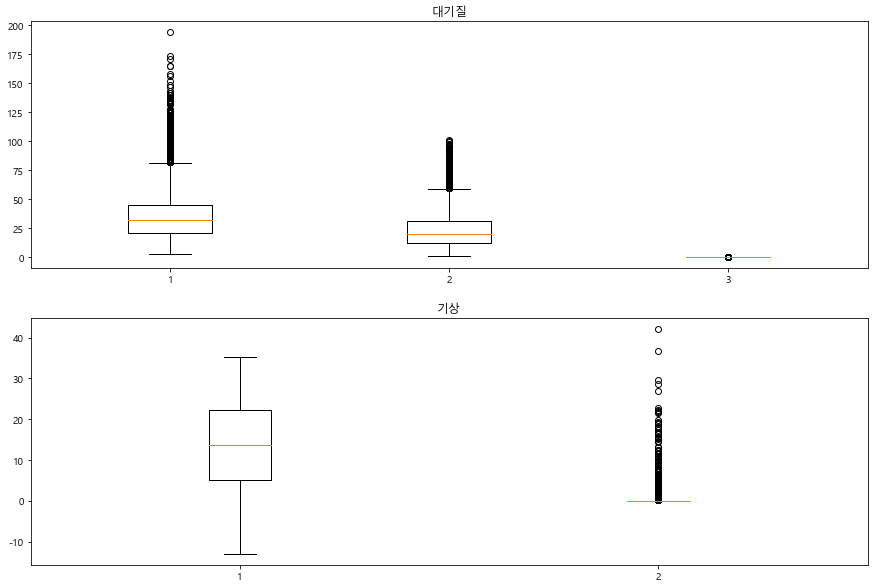

In [37]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
#'기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)'
ax1.boxplot(x=[air_quality['PM10'], air_quality['PM2.5'], air_quality['오 존']])
ax1.set_title('대기질')
ax2.boxplot(x=[weather['기온(°C)'], weather['강수량(mm)']])
ax2.set_title('기상')
fig.show()

시간단위 말고 일단위로 변경해서 시각화를 진행.
강수량, 일조, 일사는 평균이 아니라 합으로 나타내야함.
풍속 최대값
나머지는 평균.

In [38]:
def only_date(x) :
    return date(x.year, x.month, x.day)
air_quality['일'] = air_quality.index.map(only_date)

In [39]:
daily_air = air_quality.groupby('일').mean()
daily_air

,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스
일,,,,,,
2020-01-01,34.782609,28.695652,0.002696,0.037174,0.652174,0.002870
2020-01-02,57.875000,47.208333,0.002833,0.041208,0.787500,0.003708
2020-01-03,65.291667,53.041667,0.010125,0.035583,0.775000,0.003875
2020-01-04,53.125000,44.166667,0.013208,0.040833,0.929167,0.004292
2020-01-05,51.833333,43.250000,0.006000,0.046000,0.904167,0.004417
...,...,...,...,...,...,...
2020-12-27,75.041667,43.666667,0.010417,0.045958,0.783333,0.004125
2020-12-28,73.291667,45.958333,0.008167,0.053625,0.908333,0.003792
2020-12-29,76.000000,47.916667,0.011542,0.036208,0.766667,0.003417


<AxesSubplot:>

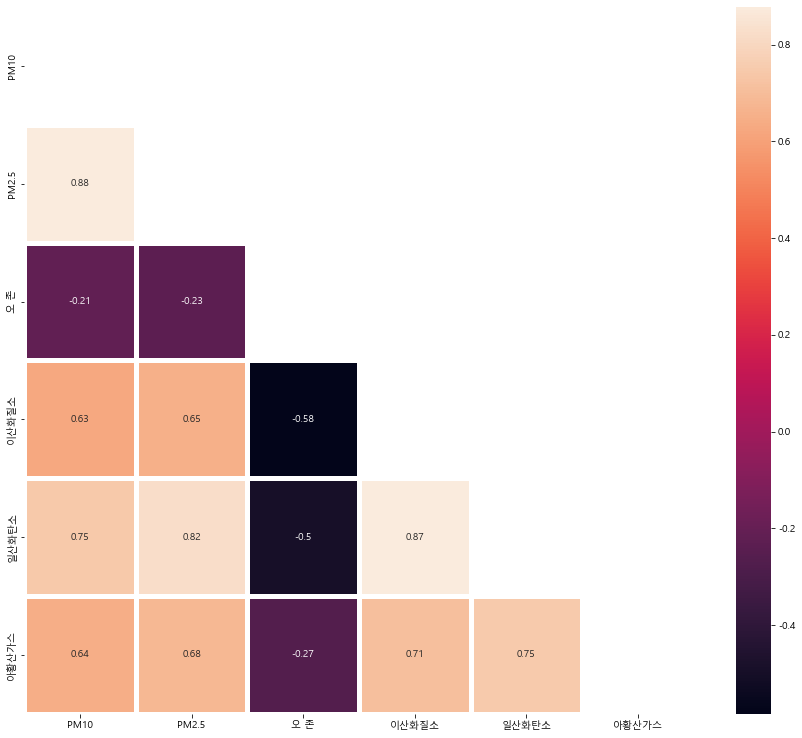

In [40]:
plt.figure(figsize=(15,13))
mask = np.zeros_like(daily_air.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(daily_air.corr(), annot=True, linewidth=5, mask=mask)

In [41]:
weather.index

DatetimeIndex(['2020-01-01 01:00:00', '2020-01-01 02:00:00',
               '2020-01-01 03:00:00', '2020-01-01 04:00:00',
               '2020-01-01 05:00:00', '2020-01-01 06:00:00',
               '2020-01-01 07:00:00', '2020-01-01 08:00:00',
               '2020-01-01 09:00:00', '2020-01-01 10:00:00',
               ...
               '2020-12-31 14:00:00', '2020-12-31 15:00:00',
               '2020-12-31 16:00:00', '2020-12-31 17:00:00',
               '2020-12-31 18:00:00', '2020-12-31 19:00:00',
               '2020-12-31 20:00:00', '2020-12-31 21:00:00',
               '2020-12-31 22:00:00', '2020-12-31 23:00:00'],
              dtype='datetime64[ns]', name='날짜', length=8783, freq=None)

In [42]:
weather['일'] = weather.index.map(only_date)
display(weather)
print(weather.columns)

,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),전운량(10분위),중하층운량(10분위),일
날짜,,,,,,,,,,,,,,
2020-01-01 01:00:00,-5.9,0.0,1.7,50,40,1.6,-17.3,1021.8,1033.0,0.0,0.0,9.0,9.0,2020-01-01
2020-01-01 02:00:00,-5.7,0.0,0.1,0,42,1.7,-16.5,1021.6,1032.8,0.0,0.0,9.0,9.0,2020-01-01
2020-01-01 03:00:00,-5.6,0.0,0.0,0,46,1.8,-15.4,1021.5,1032.7,0.0,0.0,9.0,9.0,2020-01-01
2020-01-01 04:00:00,-5.4,0.0,0.0,0,50,2.0,-14.2,1021.6,1032.8,0.0,0.0,8.0,8.0,2020-01-01
2020-01-01 05:00:00,-5.2,0.0,0.0,0,55,2.3,-12.8,1021.1,1032.3,0.0,0.0,9.0,9.0,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,-7.1,0.0,2.4,250,58,2.1,-13.9,1014.2,1025.4,0.0,0.0,0.0,0.0,2020-12-31
2020-12-31 20:00:00,-7.1,0.0,3.2,250,59,2.1,-13.7,1014.8,1026.0,0.0,0.0,0.0,0.0,2020-12-31
2020-12-31 21:00:00,-7.2,0.0,2.7,250,61,2.2,-13.4,1015.3,1026.5,0.0,0.0,0.0,0.0,2020-12-31


Index(['기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)',
       '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)',
       '전운량(10분위)', '중하층운량(10분위)', '일'],
      dtype='object')


In [43]:
# 강수량, 일조, 일사는 합
# 풍속 최대값
# 나머지는 평균.

grouped = weather.groupby('일')
hap = grouped[['강수량(mm)', '일조(hr)', '일사(MJ/m2)']].sum()
display(hap)

maxi = grouped[['풍속(m/s)']].max()
display(maxi)

ave = grouped[['기온(°C)', '풍향(16방위)','습도(%)', '증기압(hPa)',
       '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '전운량(10분위)', '중하층운량(10분위)']].mean()
display(ave)

,강수량(mm),일조(hr),일사(MJ/m2)
일,,,
2020-01-01,0.1,0.8,4.53
2020-01-02,0.0,0.0,3.47
2020-01-03,0.0,8.8,10.10
2020-01-04,0.0,7.9,9.29
2020-01-05,0.0,7.1,9.10
...,...,...,...
2020-12-27,0.0,5.9,8.12
2020-12-28,1.3,8.0,9.12
2020-12-29,0.2,0.0,1.98


,풍속(m/s)
일,
2020-01-01,2.5
2020-01-02,3.1
2020-01-03,3.2
2020-01-04,4.0
2020-01-05,2.2
...,...
2020-12-27,2.6
2020-12-28,2.7
2020-12-29,4.2


,기온(°C),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),중하층운량(10분위)
일,,,,,,,,,
2020-01-01,-2.543478,52.173913,62.739130,3.278261,-8.778261,1021.247826,1032.326087,8.869565,8.869565
2020-01-02,0.987500,145.000000,64.875000,4.254167,-4.904167,1018.837500,1029.729167,7.333333,7.333333
2020-01-03,0.120833,297.916667,57.833333,3.404167,-8.054167,1016.633333,1027.520833,0.583333,0.208333
2020-01-04,1.054167,202.500000,50.875000,3.287500,-8.262500,1015.166667,1026.016667,1.875000,1.875000
2020-01-05,1.175000,155.833333,45.666667,2.954167,-9.616667,1019.504167,1030.391667,3.625000,1.208333
...,...,...,...,...,...,...,...,...,...
2020-12-27,5.395833,79.583333,63.125000,5.620833,-1.212500,1011.112500,1021.725000,7.833333,4.250000
2020-12-28,6.920833,167.916667,71.000000,6.941667,1.708333,1012.475000,1023.045833,5.791667,4.583333
2020-12-29,1.033333,258.750000,71.958333,4.916667,-3.566667,1011.325000,1022.125000,8.416667,4.375000


In [44]:
daily_weather = pd.concat([hap, maxi, ave], axis= 1)
daily_weather

,강수량(mm),일조(hr),일사(MJ/m2),풍속(m/s),기온(°C),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),중하층운량(10분위)
일,,,,,,,,,,,,,
2020-01-01,0.1,0.8,4.53,2.5,-2.543478,52.173913,62.739130,3.278261,-8.778261,1021.247826,1032.326087,8.869565,8.869565
2020-01-02,0.0,0.0,3.47,3.1,0.987500,145.000000,64.875000,4.254167,-4.904167,1018.837500,1029.729167,7.333333,7.333333
2020-01-03,0.0,8.8,10.10,3.2,0.120833,297.916667,57.833333,3.404167,-8.054167,1016.633333,1027.520833,0.583333,0.208333
2020-01-04,0.0,7.9,9.29,4.0,1.054167,202.500000,50.875000,3.287500,-8.262500,1015.166667,1026.016667,1.875000,1.875000
2020-01-05,0.0,7.1,9.10,2.2,1.175000,155.833333,45.666667,2.954167,-9.616667,1019.504167,1030.391667,3.625000,1.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.0,5.9,8.12,2.6,5.395833,79.583333,63.125000,5.620833,-1.212500,1011.112500,1021.725000,7.833333,4.250000
2020-12-28,1.3,8.0,9.12,2.7,6.920833,167.916667,71.000000,6.941667,1.708333,1012.475000,1023.045833,5.791667,4.583333
2020-12-29,0.2,0.0,1.98,4.2,1.033333,258.750000,71.958333,4.916667,-3.566667,1011.325000,1022.125000,8.416667,4.375000


<AxesSubplot:>

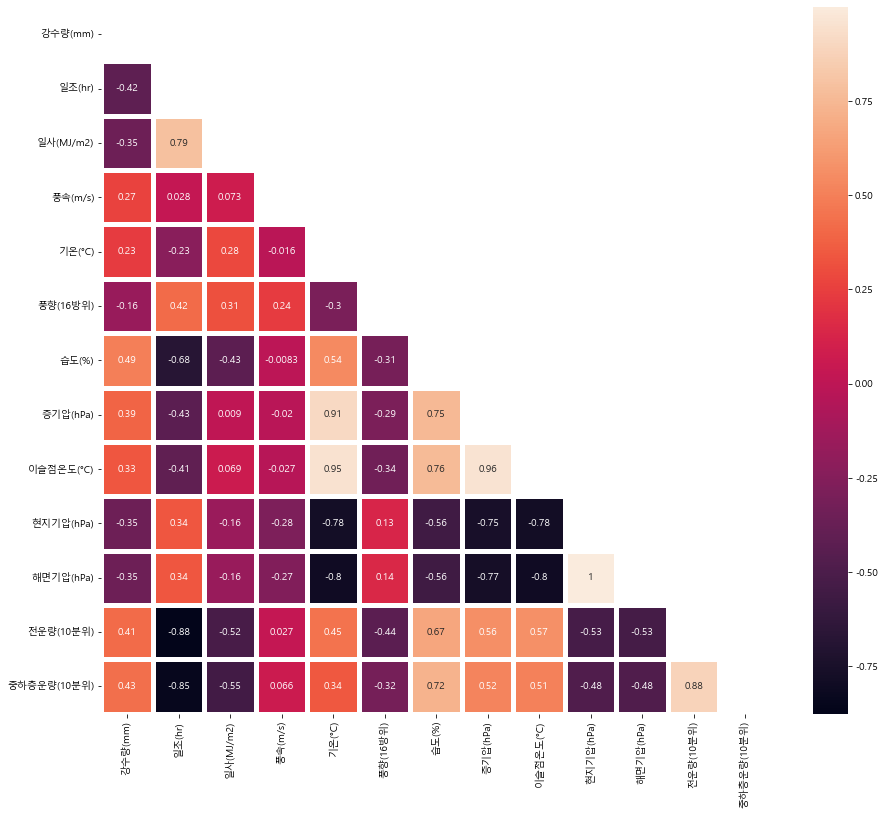

In [45]:
plt.figure(figsize=(15,13))
mask = np.zeros_like(daily_weather.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(daily_weather.corr(), annot=True, linewidth=5, mask=mask)

In [46]:
total = pd.merge(daily_air[['PM10', 'PM2.5']], daily_weather,left_index= True, right_index= True, how='inner')

<AxesSubplot:>

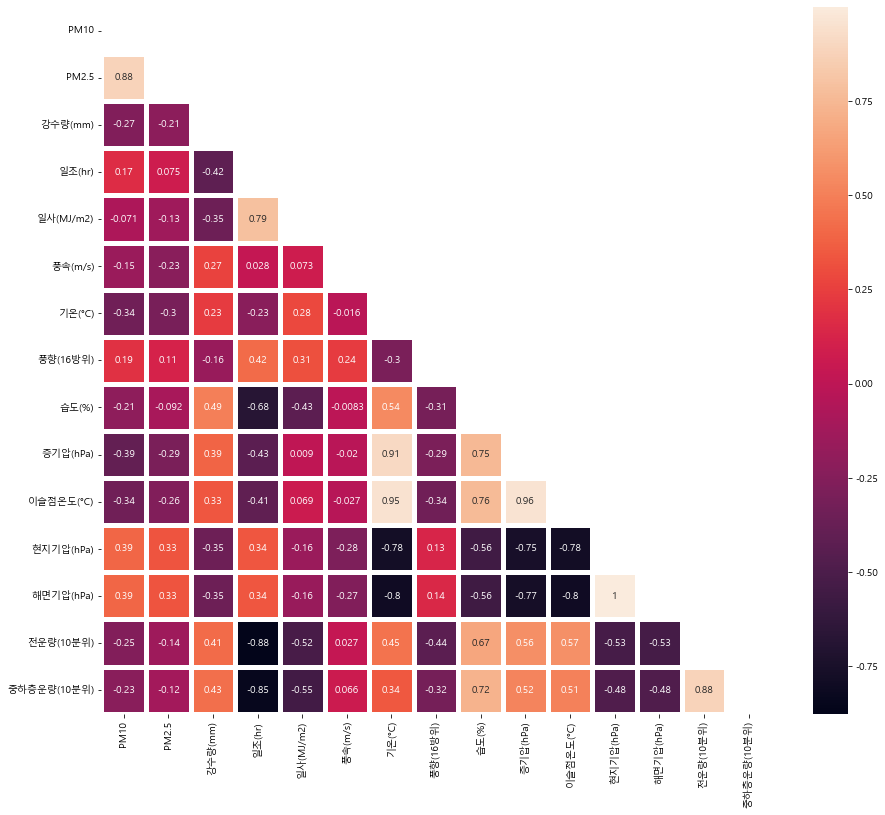

In [47]:
plt.figure(figsize=(15,13))
mask = np.zeros_like(total.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(total.corr(), annot=True, linewidth=5, mask=mask)

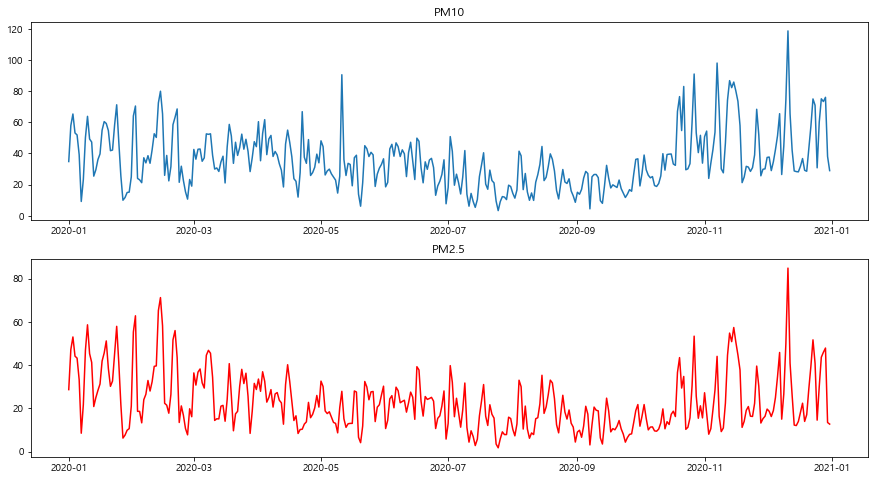

In [48]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(2,1,1)
ax1.plot(daily_air.index, daily_air['PM10'])
ax1.set_title('PM10')

ax2 = fig.add_subplot(2,1,2)
ax2.plot(daily_air.index, daily_air['PM2.5'], color='r')
ax2.set_title('PM2.5')
plt.show()

## air data => pm10, pm2.5만 추출 & category화

In [49]:
def PM10_cat(x):
    if x <=30 :
        return 1
    elif x <=80 :
        return 2
    elif x <= 150 :
        return 3
    else :
        return 4

def PM25_cat(x):
    if x <= 15 :
        return 1
    elif x <= 35 :
        return 2
    elif x <= 75 :
        return 3
    else :
        return 4

finedust = pd.DataFrame({'PM10' : daily_air['PM10'].map(PM10_cat),
                        'PM2.5': daily_air['PM2.5'].map(PM25_cat)},
                        index=daily_air.index)

In [50]:
finedust

,PM10,PM2.5
일,,
2020-01-01,2,2
2020-01-02,2,3
2020-01-03,2,3
2020-01-04,2,3
2020-01-05,2,3
...,...,...
2020-12-27,2,3
2020-12-28,2,3
2020-12-29,2,3


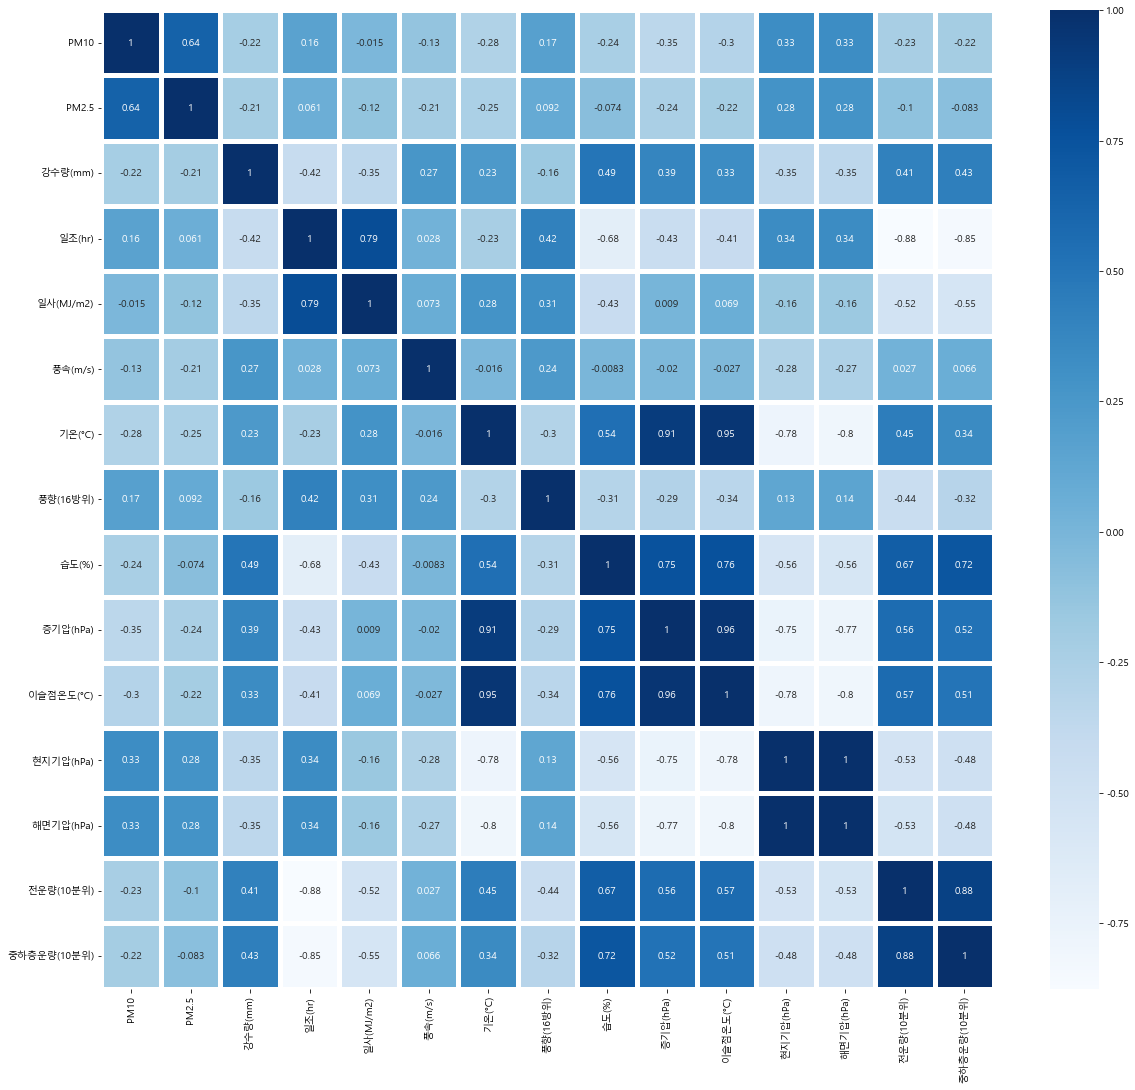

In [51]:
total = pd.merge(finedust, daily_weather,left_index= True, right_index= True, how='inner')
plt.figure(figsize=(20,18))
sns.heatmap(total.corr(), cmap='Blues', annot=True, linewidth=5)
plt.show()

In [52]:
daily_weather

,강수량(mm),일조(hr),일사(MJ/m2),풍속(m/s),기온(°C),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),중하층운량(10분위)
일,,,,,,,,,,,,,
2020-01-01,0.1,0.8,4.53,2.5,-2.543478,52.173913,62.739130,3.278261,-8.778261,1021.247826,1032.326087,8.869565,8.869565
2020-01-02,0.0,0.0,3.47,3.1,0.987500,145.000000,64.875000,4.254167,-4.904167,1018.837500,1029.729167,7.333333,7.333333
2020-01-03,0.0,8.8,10.10,3.2,0.120833,297.916667,57.833333,3.404167,-8.054167,1016.633333,1027.520833,0.583333,0.208333
2020-01-04,0.0,7.9,9.29,4.0,1.054167,202.500000,50.875000,3.287500,-8.262500,1015.166667,1026.016667,1.875000,1.875000
2020-01-05,0.0,7.1,9.10,2.2,1.175000,155.833333,45.666667,2.954167,-9.616667,1019.504167,1030.391667,3.625000,1.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.0,5.9,8.12,2.6,5.395833,79.583333,63.125000,5.620833,-1.212500,1011.112500,1021.725000,7.833333,4.250000
2020-12-28,1.3,8.0,9.12,2.7,6.920833,167.916667,71.000000,6.941667,1.708333,1012.475000,1023.045833,5.791667,4.583333
2020-12-29,0.2,0.0,1.98,4.2,1.033333,258.750000,71.958333,4.916667,-3.566667,1011.325000,1022.125000,8.416667,4.375000


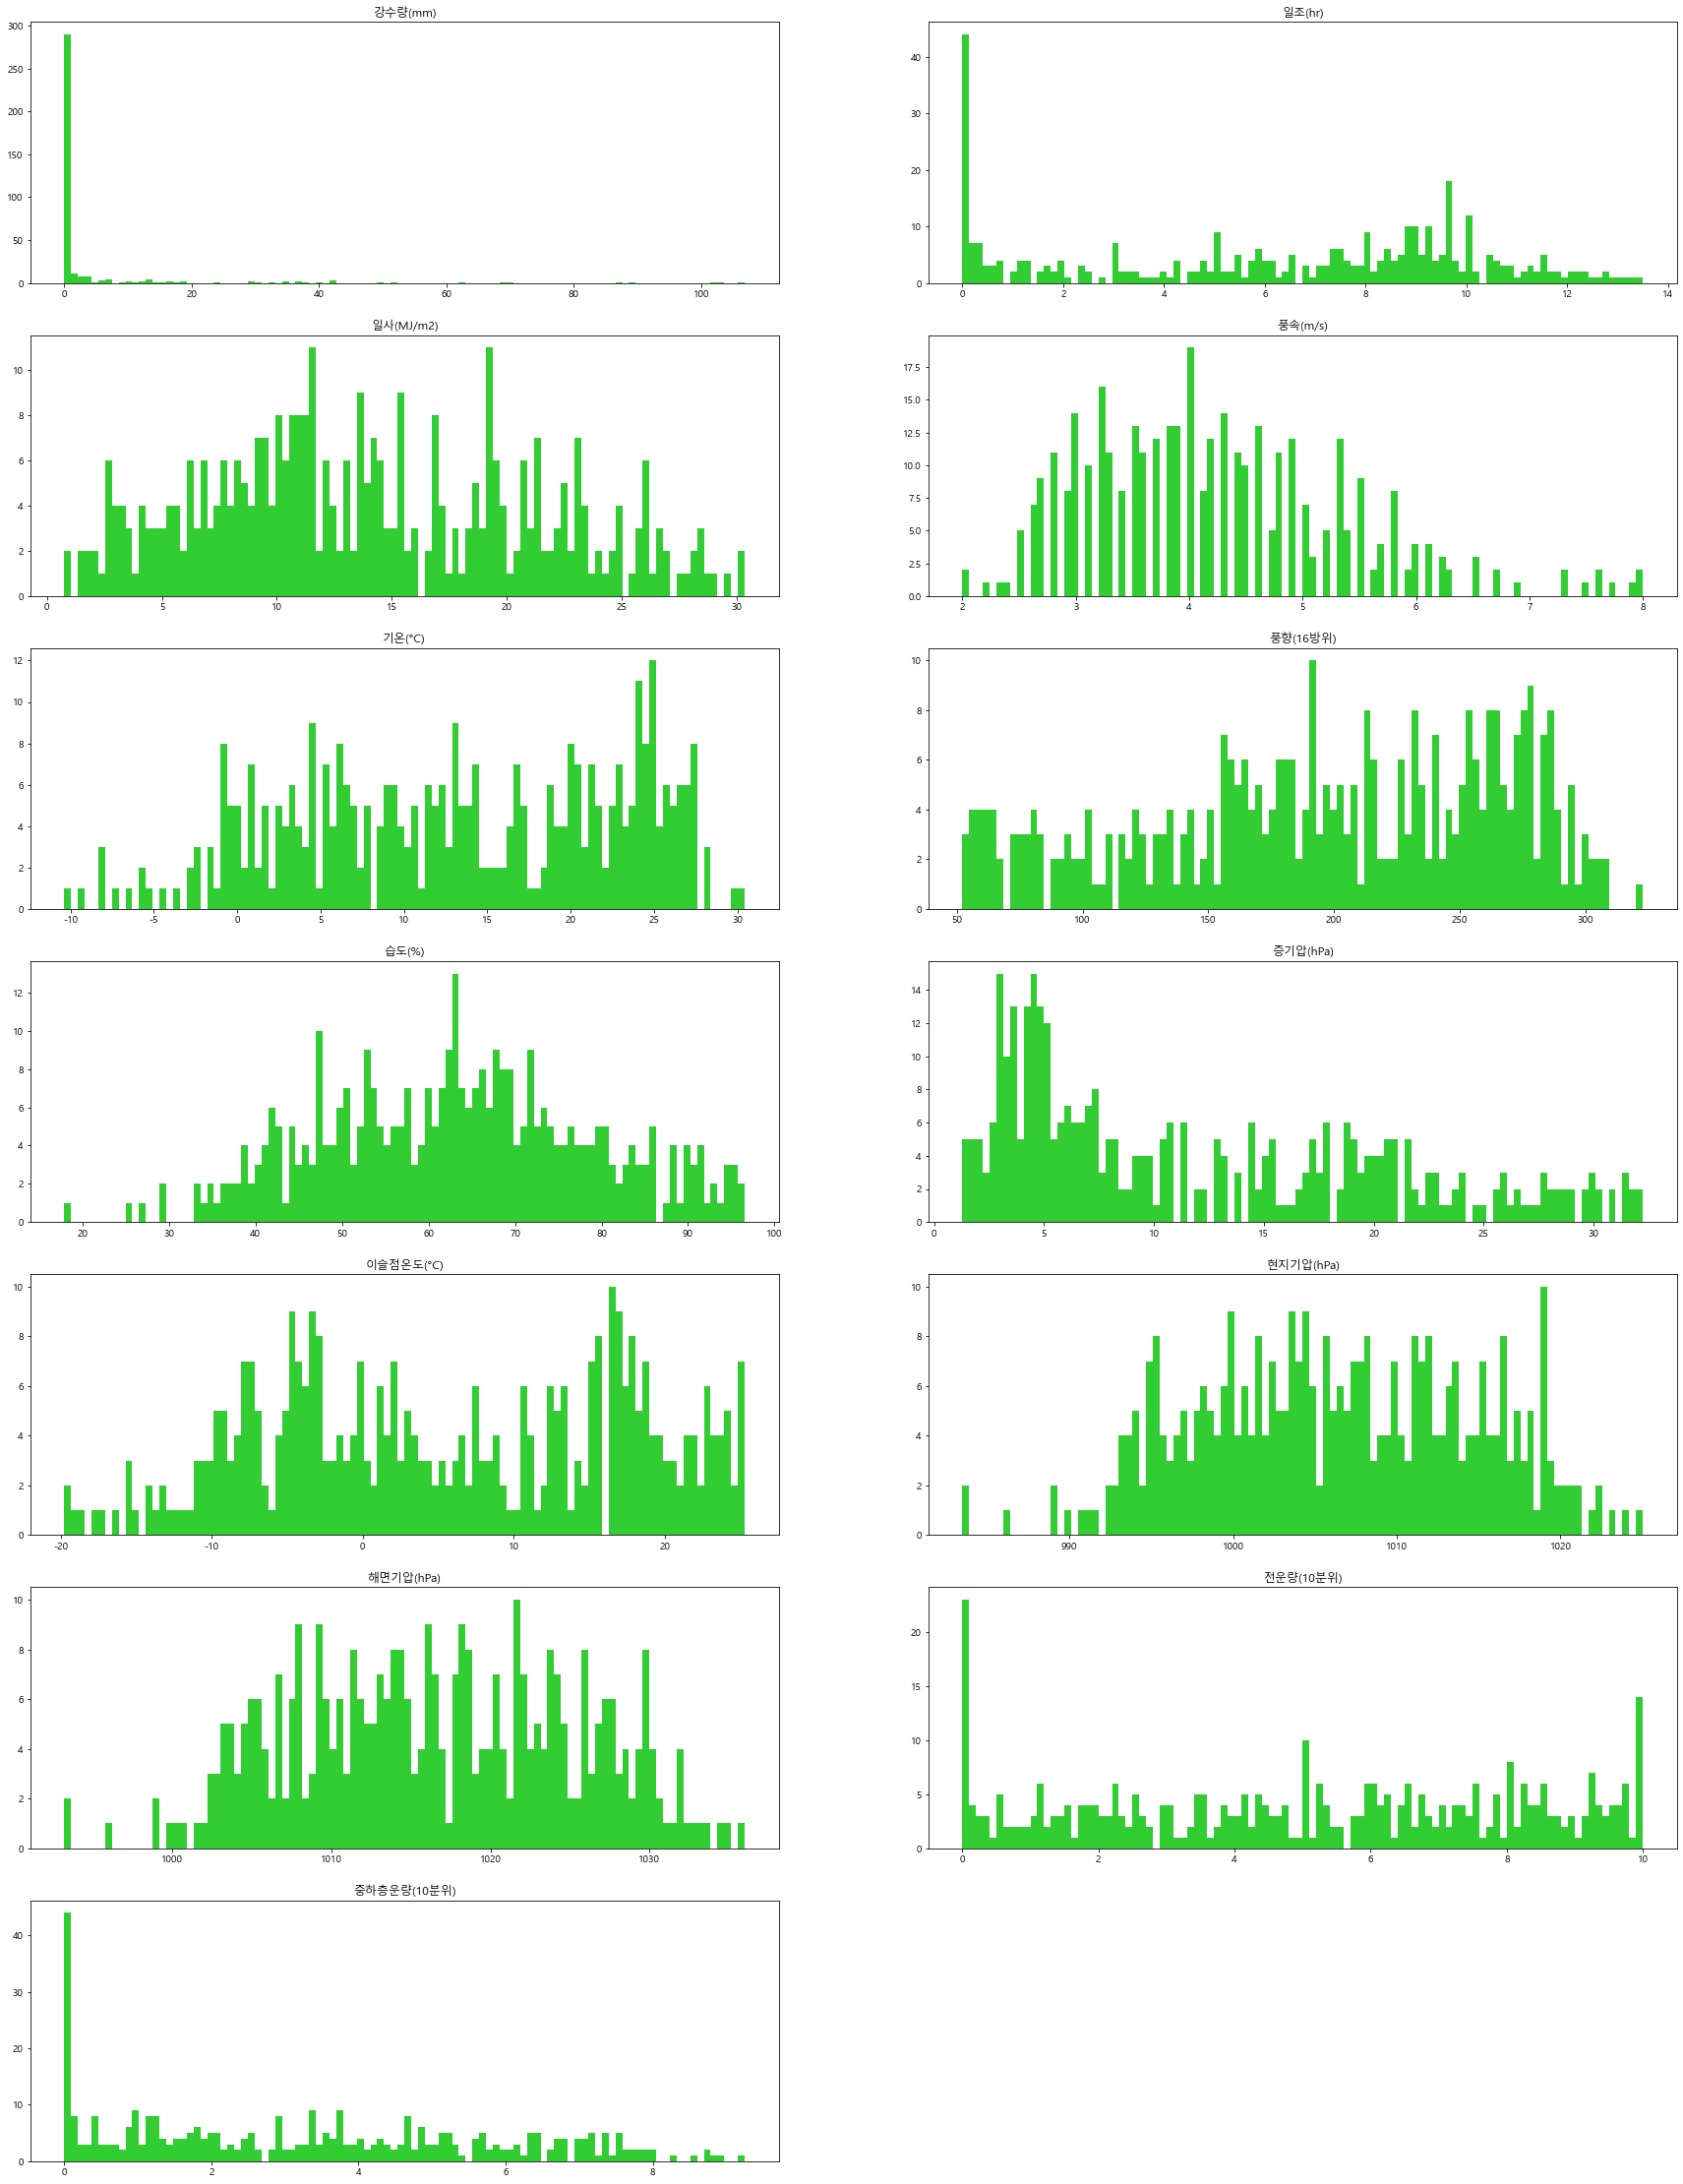

In [53]:
fig = plt.figure(figsize=(30, 40))
i = 1
for c in daily_weather.columns :
    ax = fig.add_subplot(7, 2, i)
    i += 1
    ax.hist(daily_weather[c], bins=100, color='limegreen')
    ax.set_title(c)
plt.show()

### PM10

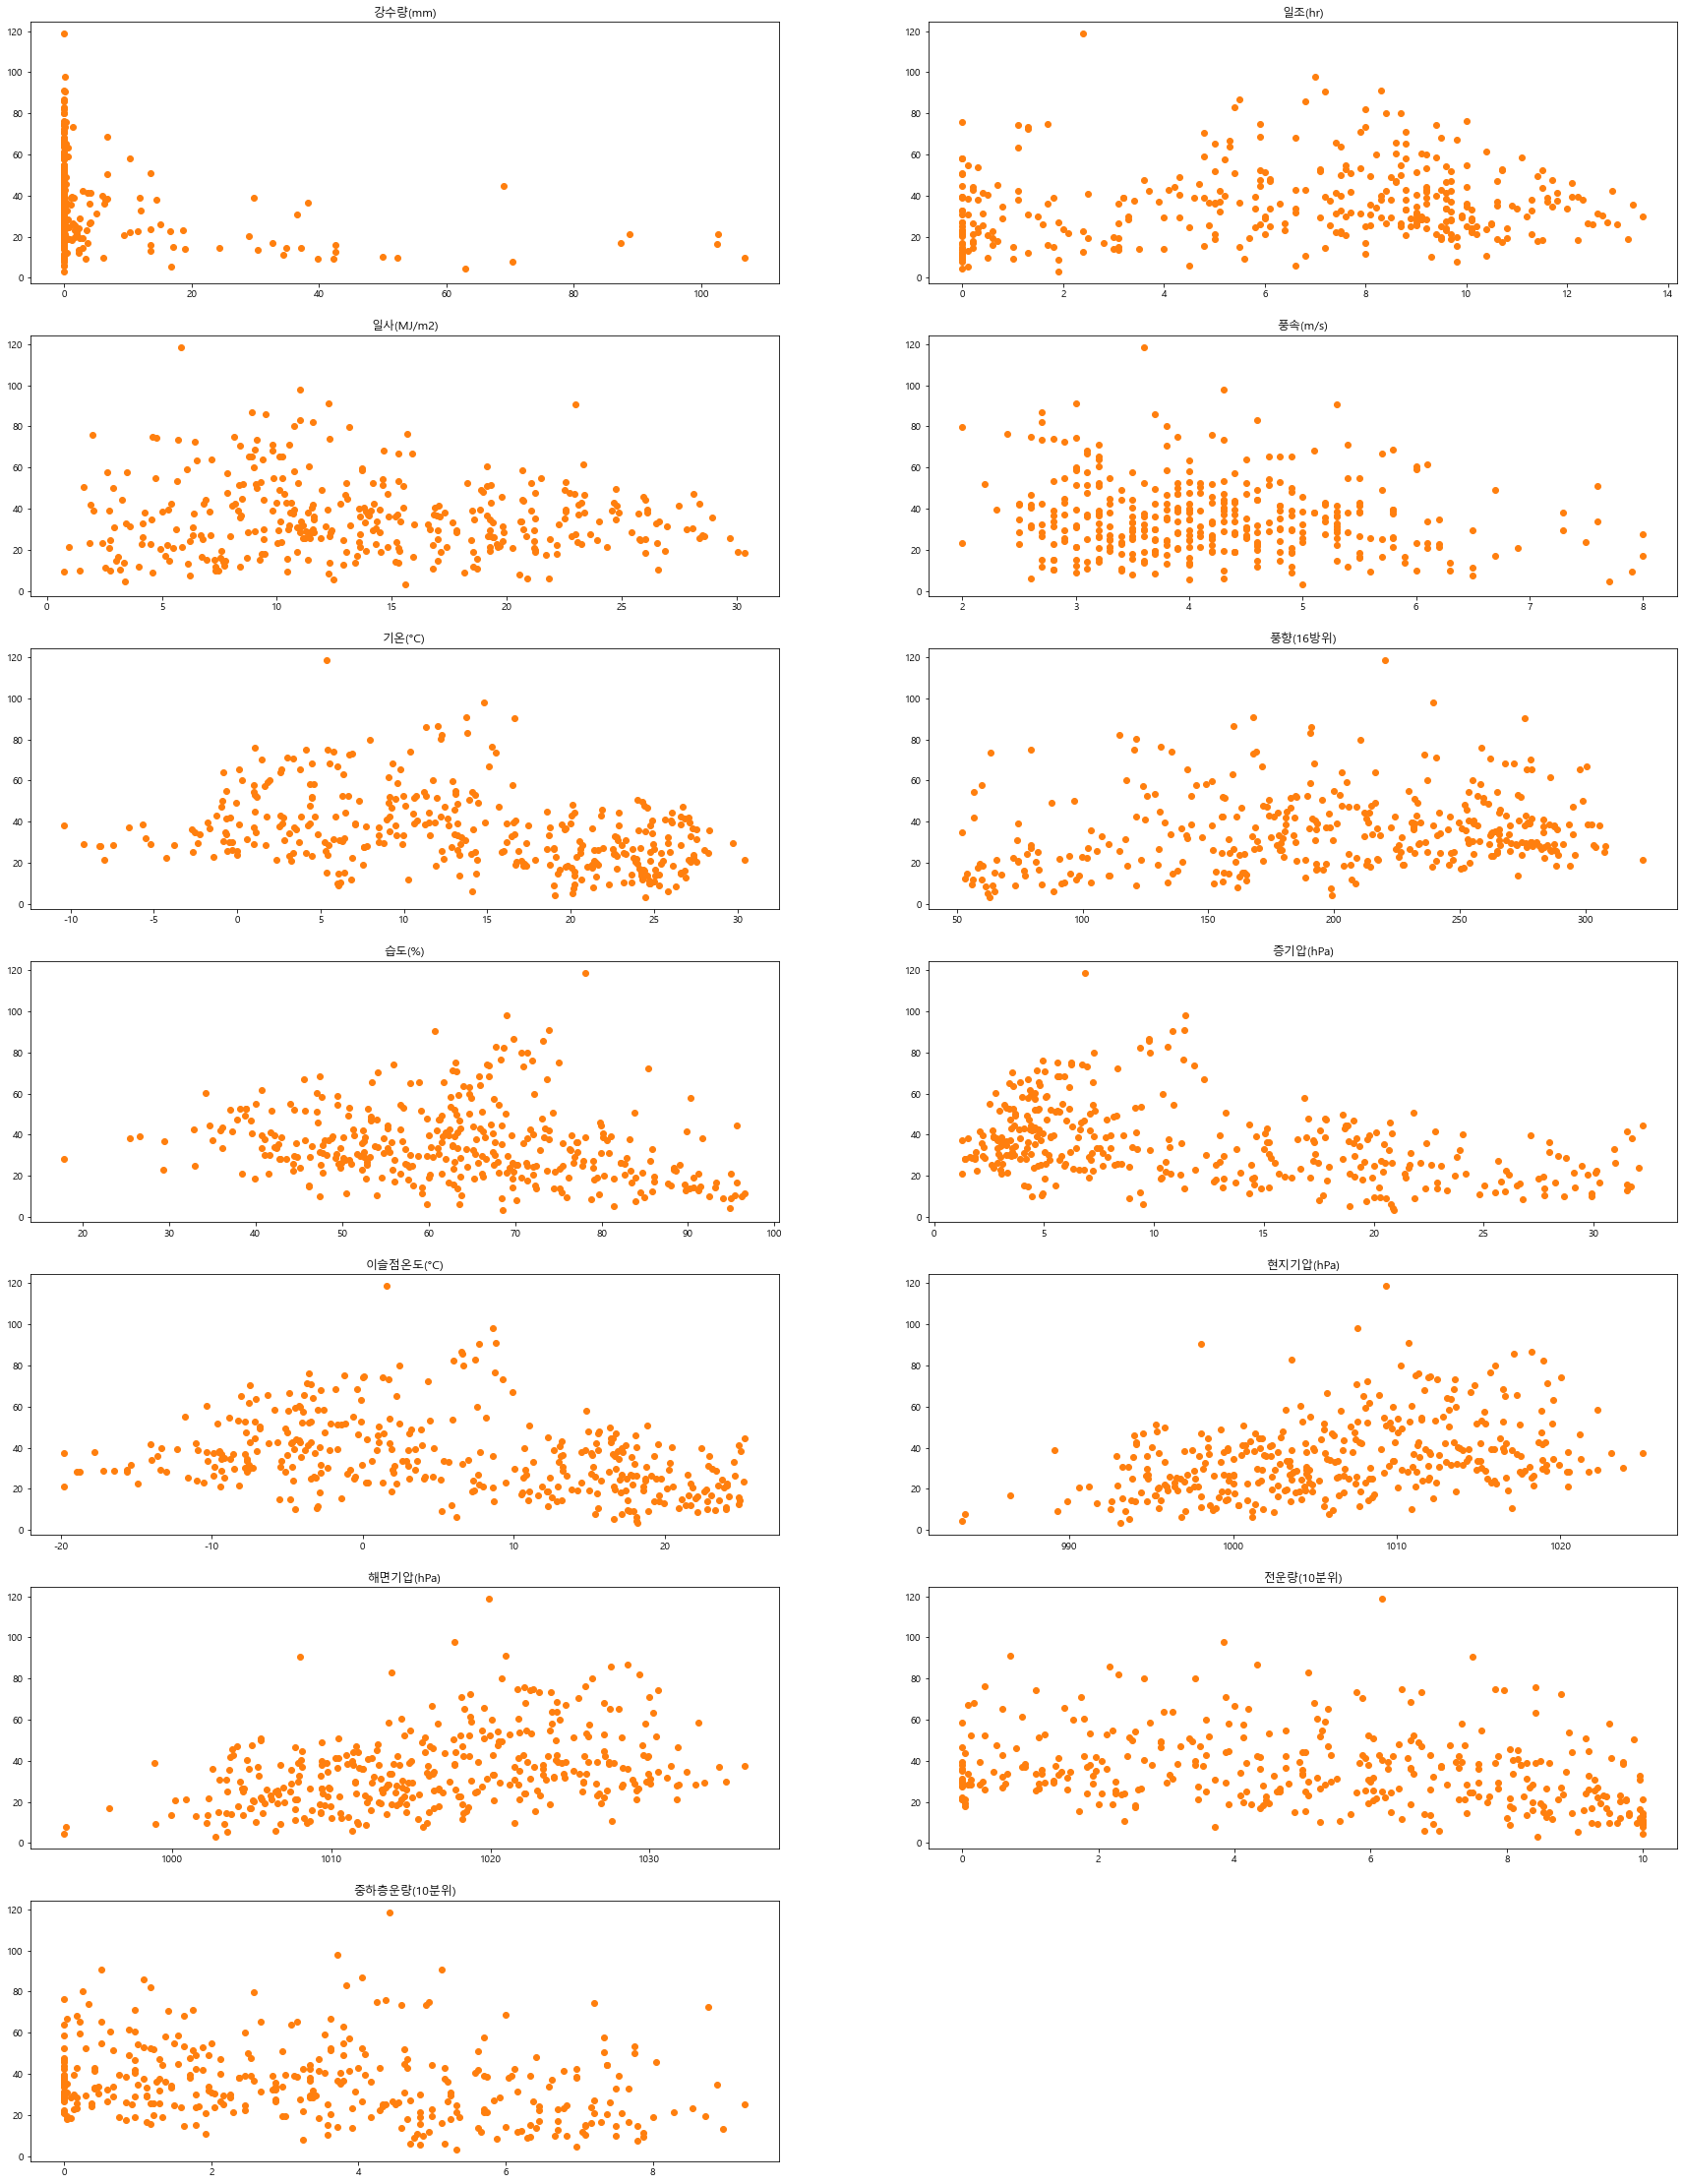

In [54]:
fig = plt.figure(figsize=(30, 40))
i = 1
for c in daily_weather.columns :
    ax = fig.add_subplot(7, 2, i)
    i += 1
    ax.scatter(daily_weather[c], daily_air['PM10'],color='#ff7f0e')
    ax.set_title(c)
plt.show()

### PM2.5

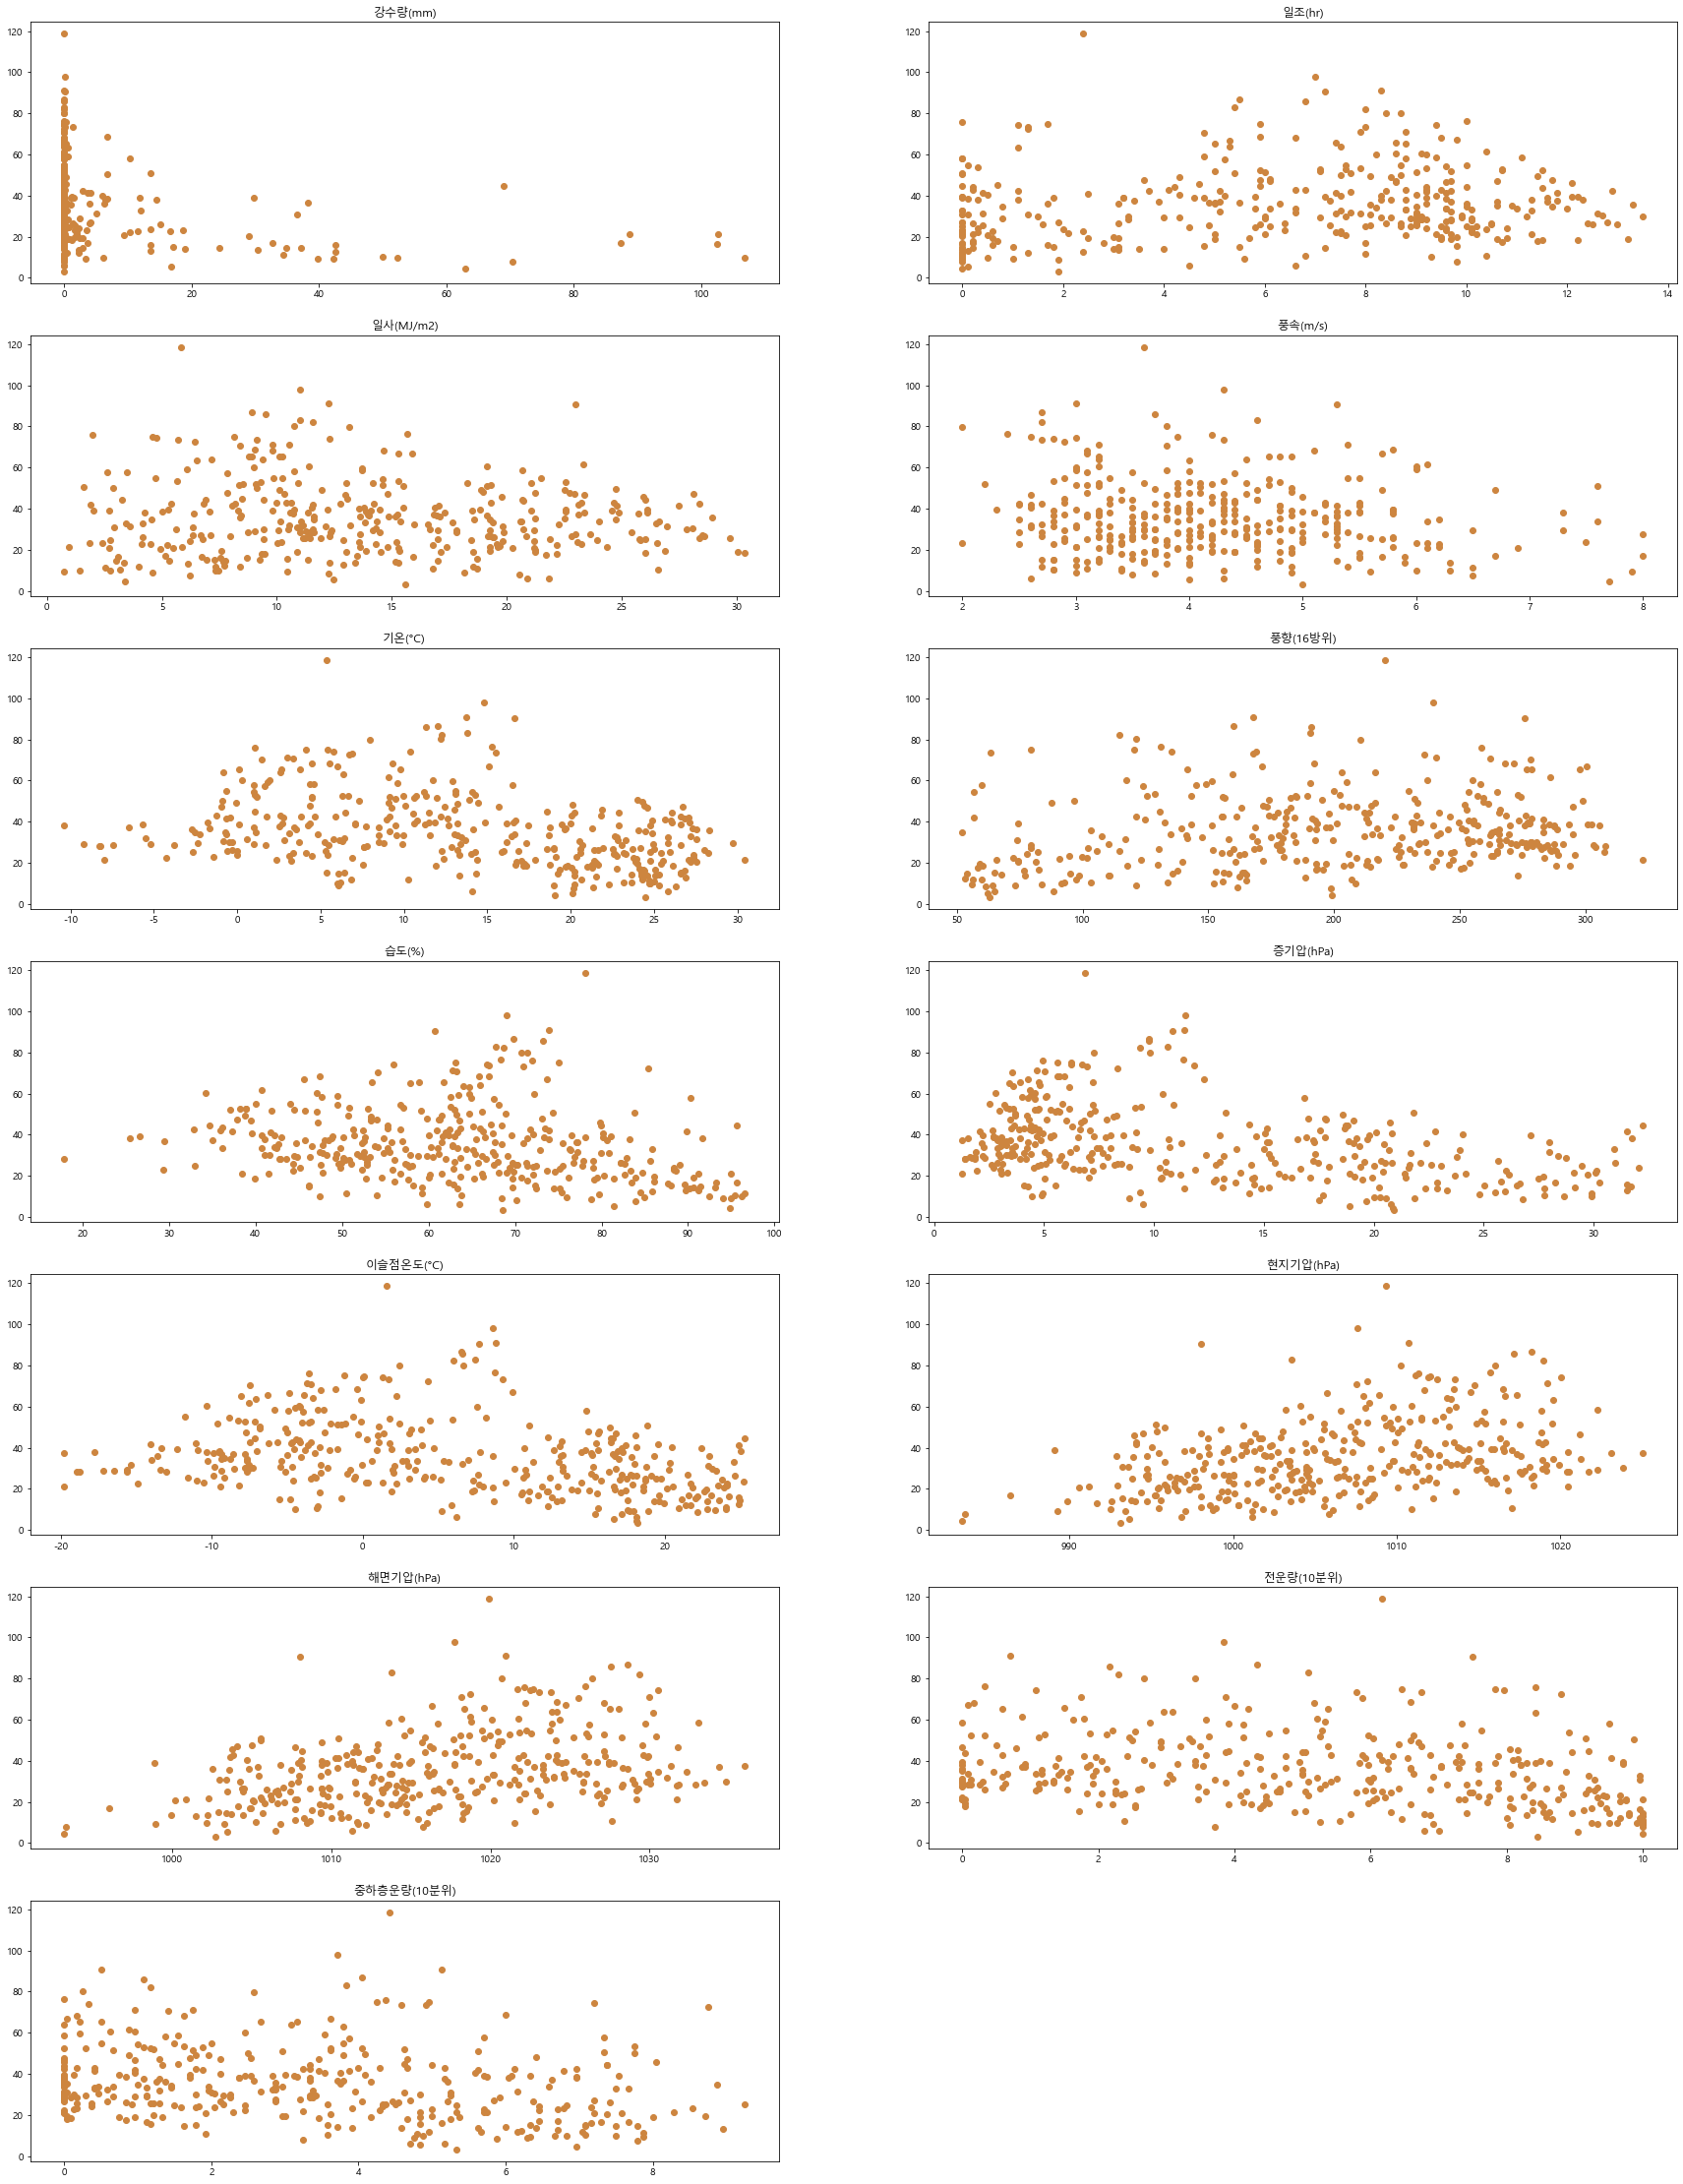

In [55]:
fig = plt.figure(figsize=(30, 40))
i = 1
for c in daily_weather.columns :
    ax = fig.add_subplot(7, 2, i)
    i += 1
    ax.scatter(daily_weather[c], daily_air['PM10'],color='peru')
    ax.set_title(c)
plt.show()

### PM10 & PM2.5

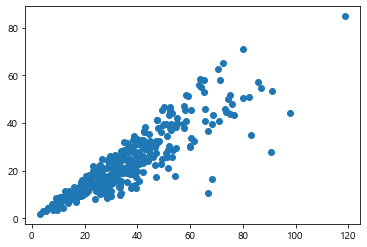

In [56]:
plt.scatter(daily_air['PM10'], daily_air['PM2.5'])

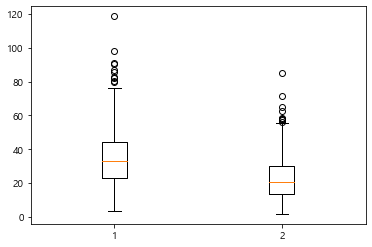

In [57]:
plt.boxplot(x=[daily_air['PM10'], daily_air['PM2.5']])
plt.show()

In [58]:
print("PM10")
print(daily_air['PM10'].describe())

PM10
count    366.000000
mean      35.581487
std       18.272386
min        3.291667
25%       22.854167
50%       32.916667
75%       44.364583
max      118.625000
Name: PM10, dtype: float64


In [59]:
finedust

,PM10,PM2.5
일,,
2020-01-01,2,2
2020-01-02,2,3
2020-01-03,2,3
2020-01-04,2,3
2020-01-05,2,3
...,...,...
2020-12-27,2,3
2020-12-28,2,3
2020-12-29,2,3


월 컬럼 추가

In [60]:
daily_weather['월'] = daily_weather.index.map(lambda x : x.month)

In [61]:
daily_weather

,강수량(mm),일조(hr),일사(MJ/m2),풍속(m/s),기온(°C),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),중하층운량(10분위),월
일,,,,,,,,,,,,,,
2020-01-01,0.1,0.8,4.53,2.5,-2.543478,52.173913,62.739130,3.278261,-8.778261,1021.247826,1032.326087,8.869565,8.869565,1
2020-01-02,0.0,0.0,3.47,3.1,0.987500,145.000000,64.875000,4.254167,-4.904167,1018.837500,1029.729167,7.333333,7.333333,1
2020-01-03,0.0,8.8,10.10,3.2,0.120833,297.916667,57.833333,3.404167,-8.054167,1016.633333,1027.520833,0.583333,0.208333,1
2020-01-04,0.0,7.9,9.29,4.0,1.054167,202.500000,50.875000,3.287500,-8.262500,1015.166667,1026.016667,1.875000,1.875000,1
2020-01-05,0.0,7.1,9.10,2.2,1.175000,155.833333,45.666667,2.954167,-9.616667,1019.504167,1030.391667,3.625000,1.208333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.0,5.9,8.12,2.6,5.395833,79.583333,63.125000,5.620833,-1.212500,1011.112500,1021.725000,7.833333,4.250000,12
2020-12-28,1.3,8.0,9.12,2.7,6.920833,167.916667,71.000000,6.941667,1.708333,1012.475000,1023.045833,5.791667,4.583333,12
2020-12-29,0.2,0.0,1.98,4.2,1.033333,258.750000,71.958333,4.916667,-3.566667,1011.325000,1022.125000,8.416667,4.375000,12


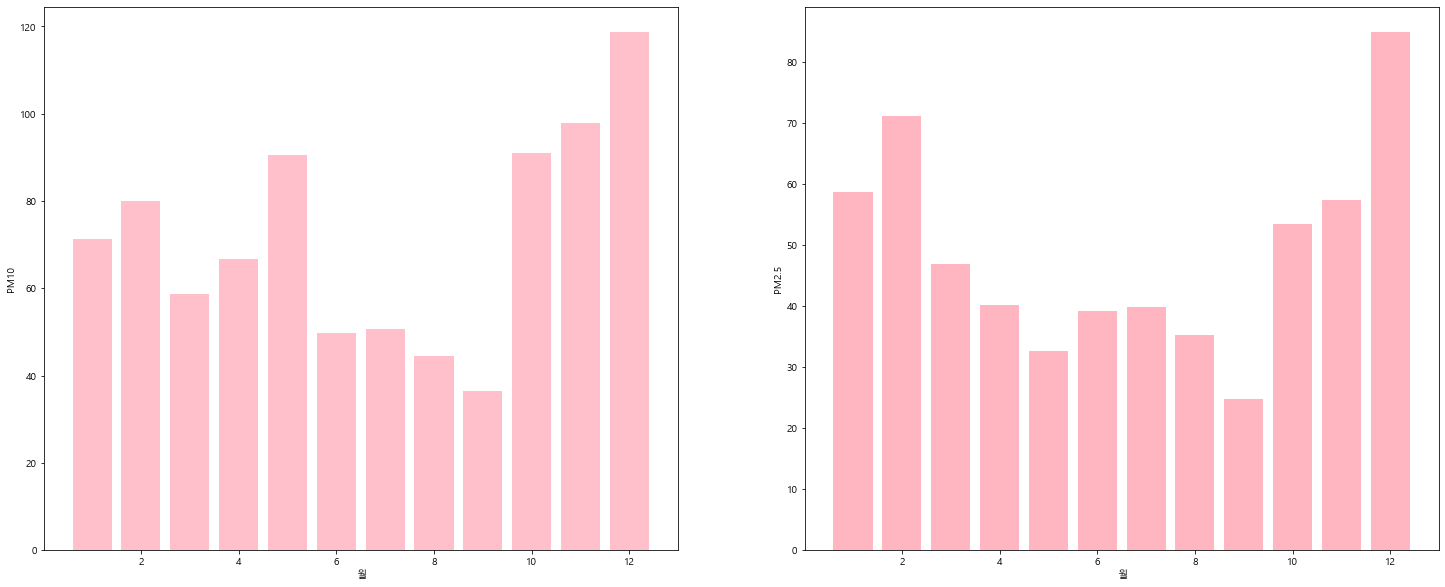

In [62]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(1,2,1)
ax1.bar(daily_weather['월'], daily_air['PM10'], color='pink')
ax1.set_xlabel('월')
ax1.set_ylabel('PM10')

ax2 = fig.add_subplot(1,2,2)
ax2.bar(daily_weather['월'], daily_air['PM2.5'], color='lightpink')
ax2.set_xlabel('월')
ax2.set_ylabel('PM2.5')
fig.show()

# 로그변환
강수량, 일조, 전운량, 중하층운량

In [63]:
daily_weather.columns

Index(['강수량(mm)', '일조(hr)', '일사(MJ/m2)', '풍속(m/s)', '기온(°C)', '풍향(16방위)',
       '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '전운량(10분위)',
       '중하층운량(10분위)', '월'],
      dtype='object')

In [64]:
log_daily_weather = daily_weather.copy()
for c in ['강수량(mm)','일조(hr)','전운량(10분위)','중하층운량(10분위)'] :
    log_daily_weather[c] = log_daily_weather[c].map(lambda x : np.log1p(x))

log는 0의 값일때 값이 음의 무한대이고, 0과 1사이의 값이 매우 가파르므로
0과 1의 값이 많을때 log1p를 사용하는 것이 좋다.

In [65]:
log_daily_weather

,강수량(mm),일조(hr),일사(MJ/m2),풍속(m/s),기온(°C),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),중하층운량(10분위),월
일,,,,,,,,,,,,,,
2020-01-01,0.095310,0.587787,4.53,2.5,-2.543478,52.173913,62.739130,3.278261,-8.778261,1021.247826,1032.326087,2.289456,2.289456,1
2020-01-02,0.000000,0.000000,3.47,3.1,0.987500,145.000000,64.875000,4.254167,-4.904167,1018.837500,1029.729167,2.120264,2.120264,1
2020-01-03,0.000000,2.282382,10.10,3.2,0.120833,297.916667,57.833333,3.404167,-8.054167,1016.633333,1027.520833,0.459532,0.189242,1
2020-01-04,0.000000,2.186051,9.29,4.0,1.054167,202.500000,50.875000,3.287500,-8.262500,1015.166667,1026.016667,1.056053,1.056053,1
2020-01-05,0.000000,2.091864,9.10,2.2,1.175000,155.833333,45.666667,2.954167,-9.616667,1019.504167,1030.391667,1.531476,0.792238,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.000000,1.931521,8.12,2.6,5.395833,79.583333,63.125000,5.620833,-1.212500,1011.112500,1021.725000,2.178532,1.658228,12
2020-12-28,0.832909,2.197225,9.12,2.7,6.920833,167.916667,71.000000,6.941667,1.708333,1012.475000,1023.045833,1.915696,1.719786,12
2020-12-29,0.182322,0.000000,1.98,4.2,1.033333,258.750000,71.958333,4.916667,-3.566667,1011.325000,1022.125000,2.242481,1.681759,12


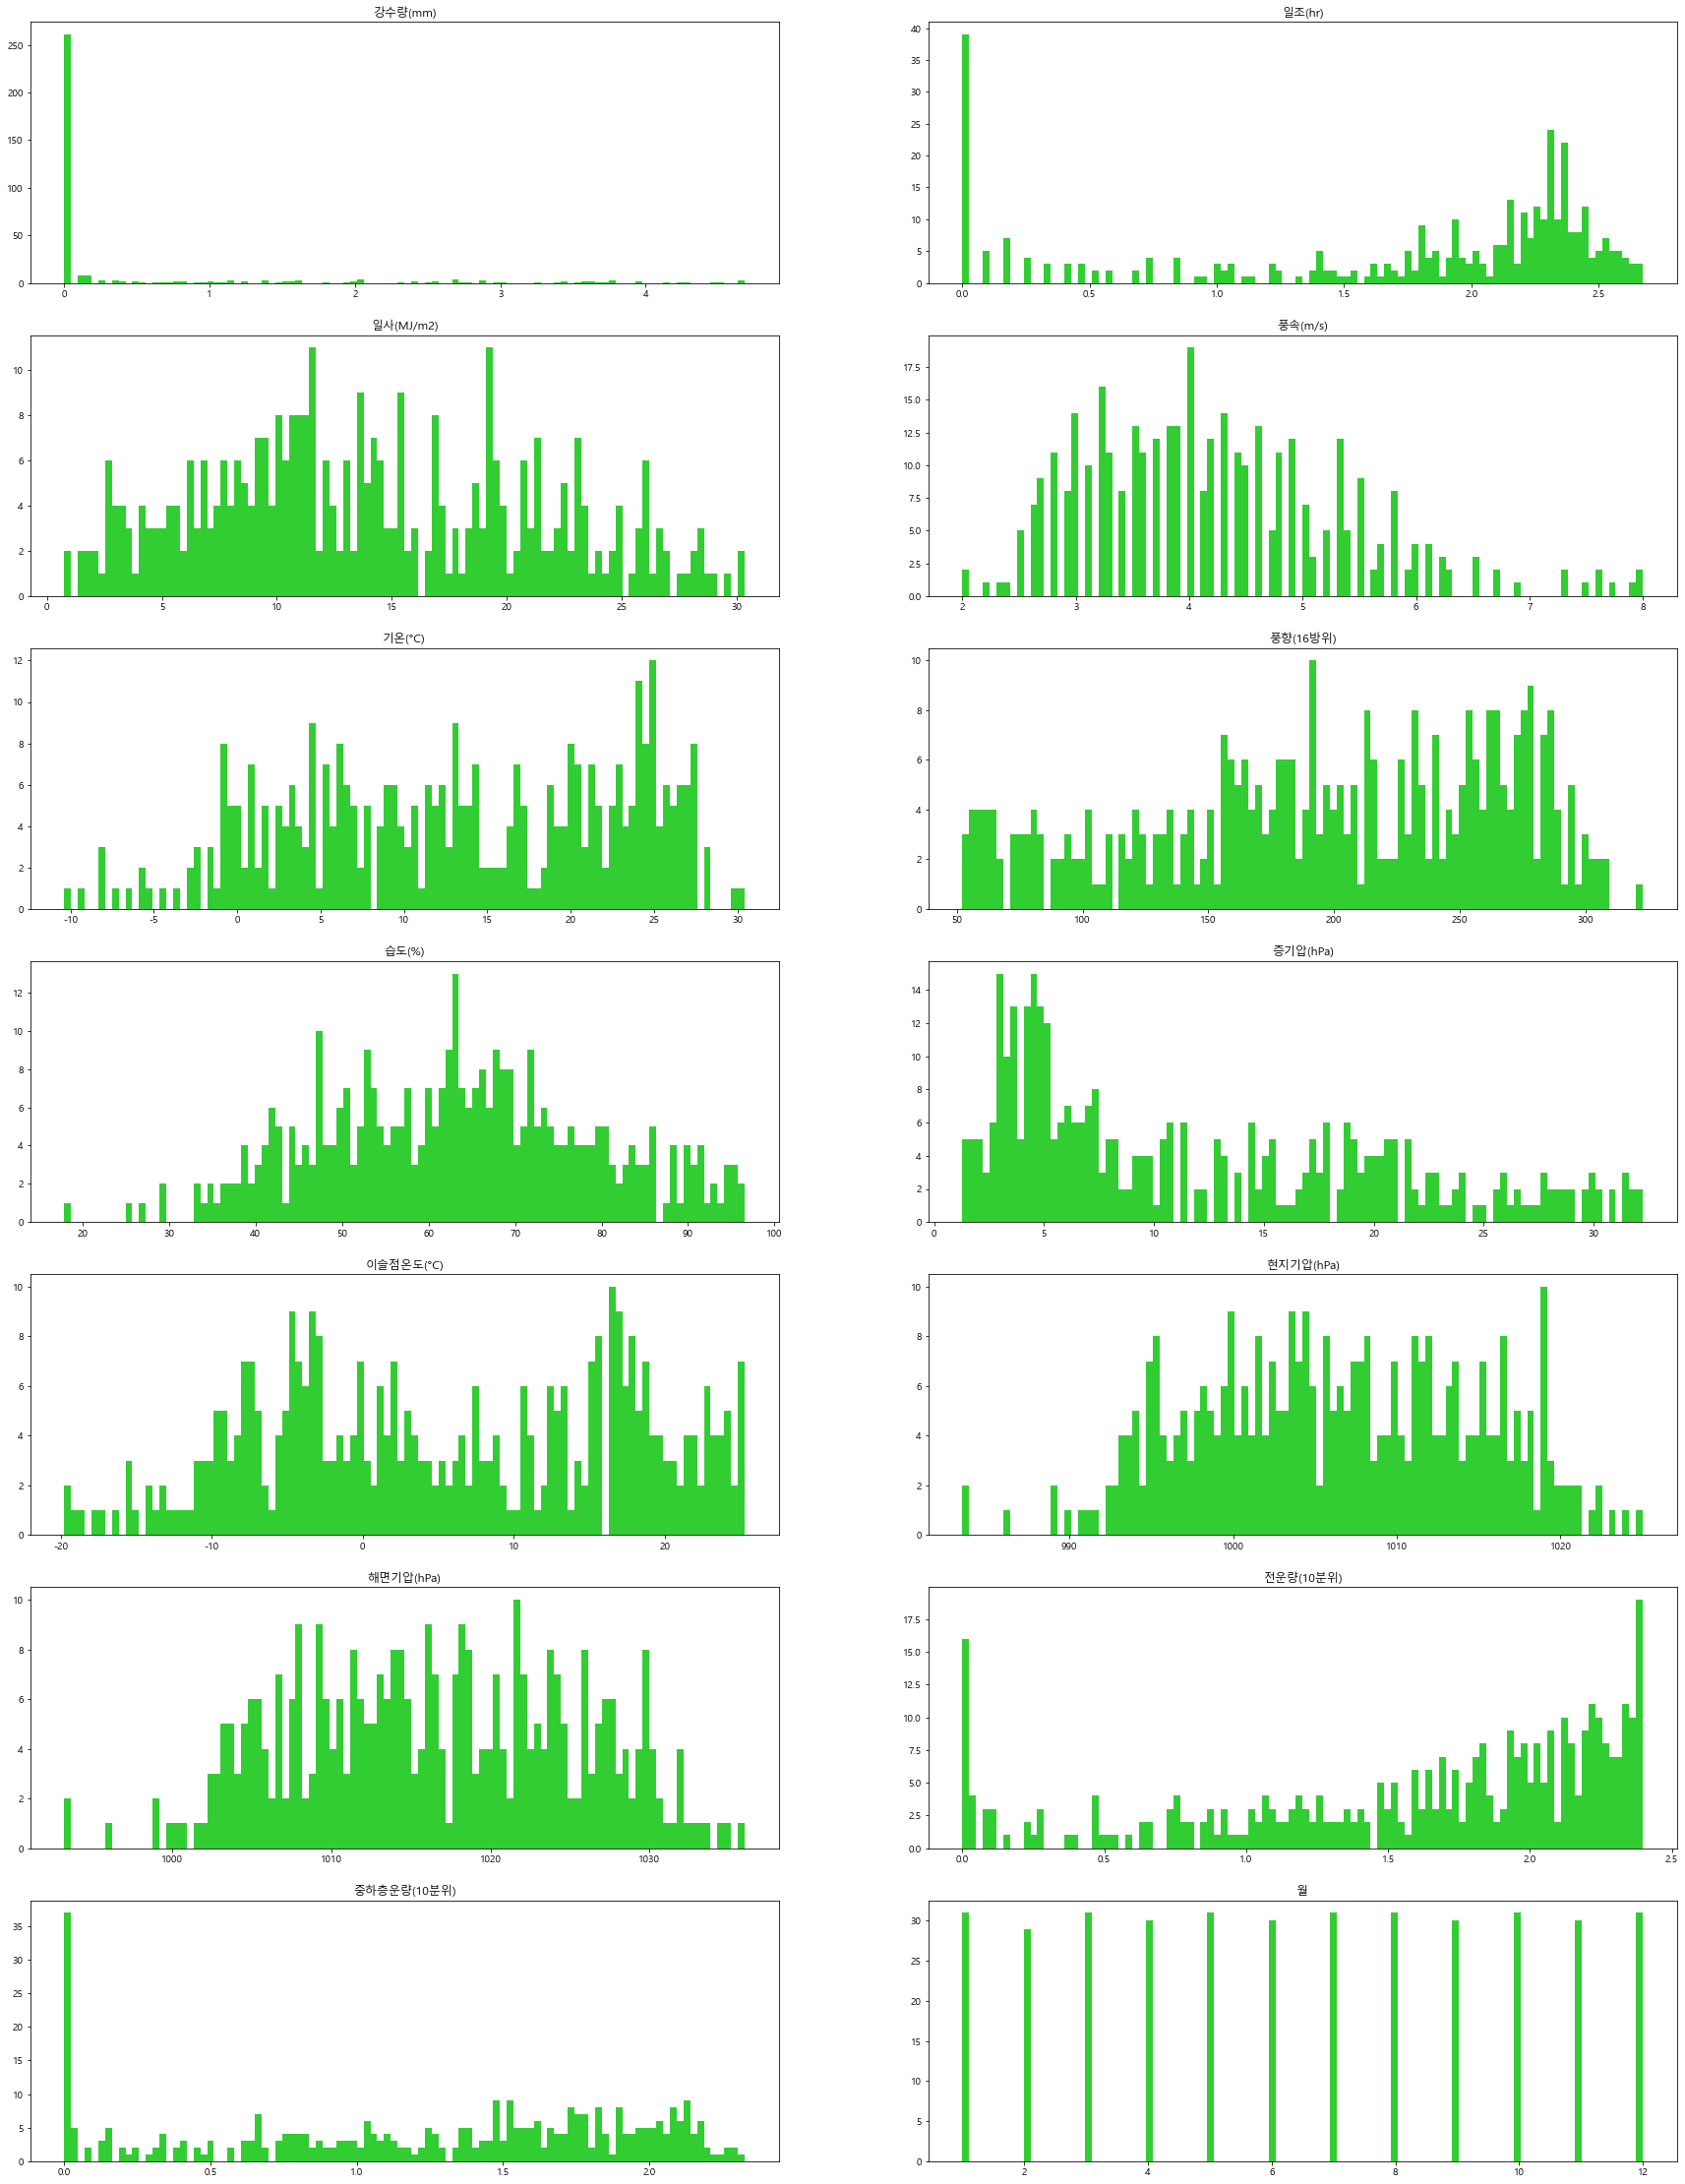

In [66]:
fig = plt.figure(figsize=(30, 40))
i = 1
for c in log_daily_weather.columns :
    ax = fig.add_subplot(7, 2, i)
    i += 1
    ax.hist(log_daily_weather[c], bins=100, color='limegreen')
    ax.set_title(c)
plt.show()

# 정규화

In [67]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

scaler.fit(log_daily_weather)
col = log_daily_weather.columns
nomalized_daily_weather = scaler.transform(log_daily_weather)
nomalized_daily_weather = pd.DataFrame(data=nomalized_daily_weather, columns=col)

In [68]:
nomalized_daily_weather

,강수량(mm),일조(hr),일사(MJ/m2),풍속(m/s),기온(°C),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),중하층운량(10분위),월
0,-0.389195,-1.295190,-1.337963,-1.491584,-1.638672,-2.060027,-0.033511,-1.015577,-1.244361,1.806352,1.819754,0.972752,1.486254,-1.597591
1,-0.473762,-1.978300,-1.488059,-0.969006,-1.272790,-0.733393,0.103308,-0.901781,-0.912002,1.515981,1.521034,0.729978,1.246998,-1.597591
2,-0.473762,0.674223,-0.549252,-0.881910,-1.362595,1.452034,-0.347763,-1.000895,-1.182241,1.250445,1.267012,-1.653007,-1.483680,-1.597591
3,-0.473762,0.562270,-0.663948,-0.185139,-1.265882,0.088375,-0.793496,-1.014499,-1.200114,1.073756,1.093990,-0.797060,-0.257914,-1.597591
4,-0.473762,0.452808,-0.690852,-1.752873,-1.253361,-0.578567,-1.127128,-1.053368,-1.316288,1.596294,1.597240,-0.114874,-0.630977,-1.597591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,-0.473762,0.266462,-0.829620,-1.404488,-0.815996,-1.668302,-0.008793,-0.742420,-0.595292,0.585351,0.600326,0.813588,0.593629,1.589675
362,0.265270,0.575255,-0.688020,-1.317392,-0.657974,-0.405876,0.495659,-0.588404,-0.344713,0.749491,0.752260,0.436444,0.680678,1.589675
363,-0.311990,-1.978300,-1.699042,-0.010947,-1.268041,0.892279,0.557048,-0.824530,-0.797257,0.610951,0.646337,0.905348,0.626903,1.589675
364,-0.473762,0.613363,-0.370837,0.772921,-2.449316,1.136427,-0.539936,-1.219045,-2.016194,0.693272,0.781496,-0.797060,-0.342364,1.589675


# 상관계수가 높은 컬럼들 삭제
다중 공선성때문
설명변수, 독립변수들은 서로 독립이어야하는데(?),
상관계수가 높은 변수는 독립이라고 할 수 없고, 상관계수가 높은 것은 데이터 분석에 악영향을 준다
따라서 다중공선성문제 때문에 상관계수가 높은, 0.9이상인 것은 삭제해주는 것이 좋다.
이유. 각 변수의 설명력이 약해져 표준오차의 증가로 드러난다.

해면기압, 현지기압 상관계수가 1이므로 해면기압 컬럼 삭제
기온 & (증기압, 이슬점온도)도 상관계수가 0.9이상이므로 컬럼삭제

In [69]:
nomalized_daily_weather.drop('해면기압(hPa)', axis=1, inplace=True)
nomalized_daily_weather

,강수량(mm),일조(hr),일사(MJ/m2),풍속(m/s),기온(°C),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),전운량(10분위),중하층운량(10분위),월
0,-0.389195,-1.295190,-1.337963,-1.491584,-1.638672,-2.060027,-0.033511,-1.015577,-1.244361,1.806352,0.972752,1.486254,-1.597591
1,-0.473762,-1.978300,-1.488059,-0.969006,-1.272790,-0.733393,0.103308,-0.901781,-0.912002,1.515981,0.729978,1.246998,-1.597591
2,-0.473762,0.674223,-0.549252,-0.881910,-1.362595,1.452034,-0.347763,-1.000895,-1.182241,1.250445,-1.653007,-1.483680,-1.597591
3,-0.473762,0.562270,-0.663948,-0.185139,-1.265882,0.088375,-0.793496,-1.014499,-1.200114,1.073756,-0.797060,-0.257914,-1.597591
4,-0.473762,0.452808,-0.690852,-1.752873,-1.253361,-0.578567,-1.127128,-1.053368,-1.316288,1.596294,-0.114874,-0.630977,-1.597591
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,-0.473762,0.266462,-0.829620,-1.404488,-0.815996,-1.668302,-0.008793,-0.742420,-0.595292,0.585351,0.813588,0.593629,1.589675
362,0.265270,0.575255,-0.688020,-1.317392,-0.657974,-0.405876,0.495659,-0.588404,-0.344713,0.749491,0.436444,0.680678,1.589675
363,-0.311990,-1.978300,-1.699042,-0.010947,-1.268041,0.892279,0.557048,-0.824530,-0.797257,0.610951,0.905348,0.626903,1.589675
364,-0.473762,0.613363,-0.370837,0.772921,-2.449316,1.136427,-0.539936,-1.219045,-2.016194,0.693272,-0.797060,-0.342364,1.589675


In [70]:
nomalized_daily_weather.drop(['증기압(hPa)', '이슬점온도(°C)'], axis=1, inplace=True)

In [71]:
finedust

,PM10,PM2.5
일,,
2020-01-01,2,2
2020-01-02,2,3
2020-01-03,2,3
2020-01-04,2,3
2020-01-05,2,3
...,...,...
2020-12-27,2,3
2020-12-28,2,3
2020-12-29,2,3


In [72]:
nomalized_daily_weather.columns

Index(['강수량(mm)', '일조(hr)', '일사(MJ/m2)', '풍속(m/s)', '기온(°C)', '풍향(16방위)',
       '습도(%)', '현지기압(hPa)', '전운량(10분위)', '중하층운량(10분위)', '월'],
      dtype='object')

<AxesSubplot:>

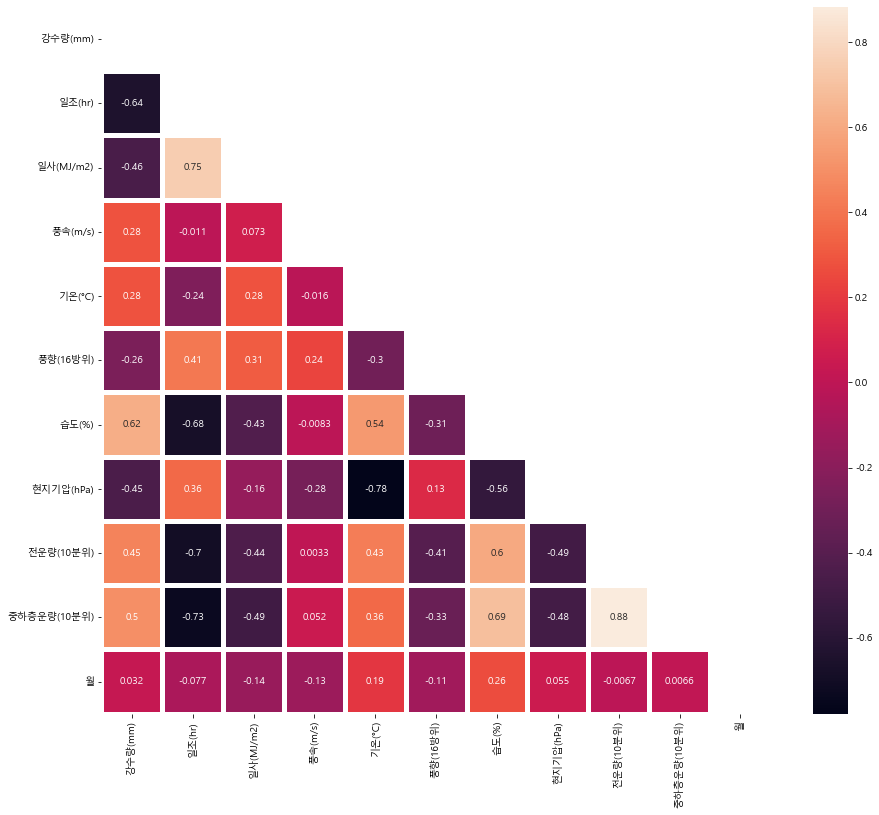

In [73]:
plt.figure(figsize=(15,13))
mask = np.zeros_like(nomalized_daily_weather.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(nomalized_daily_weather.corr(), annot=True, linewidth=5, mask=mask)

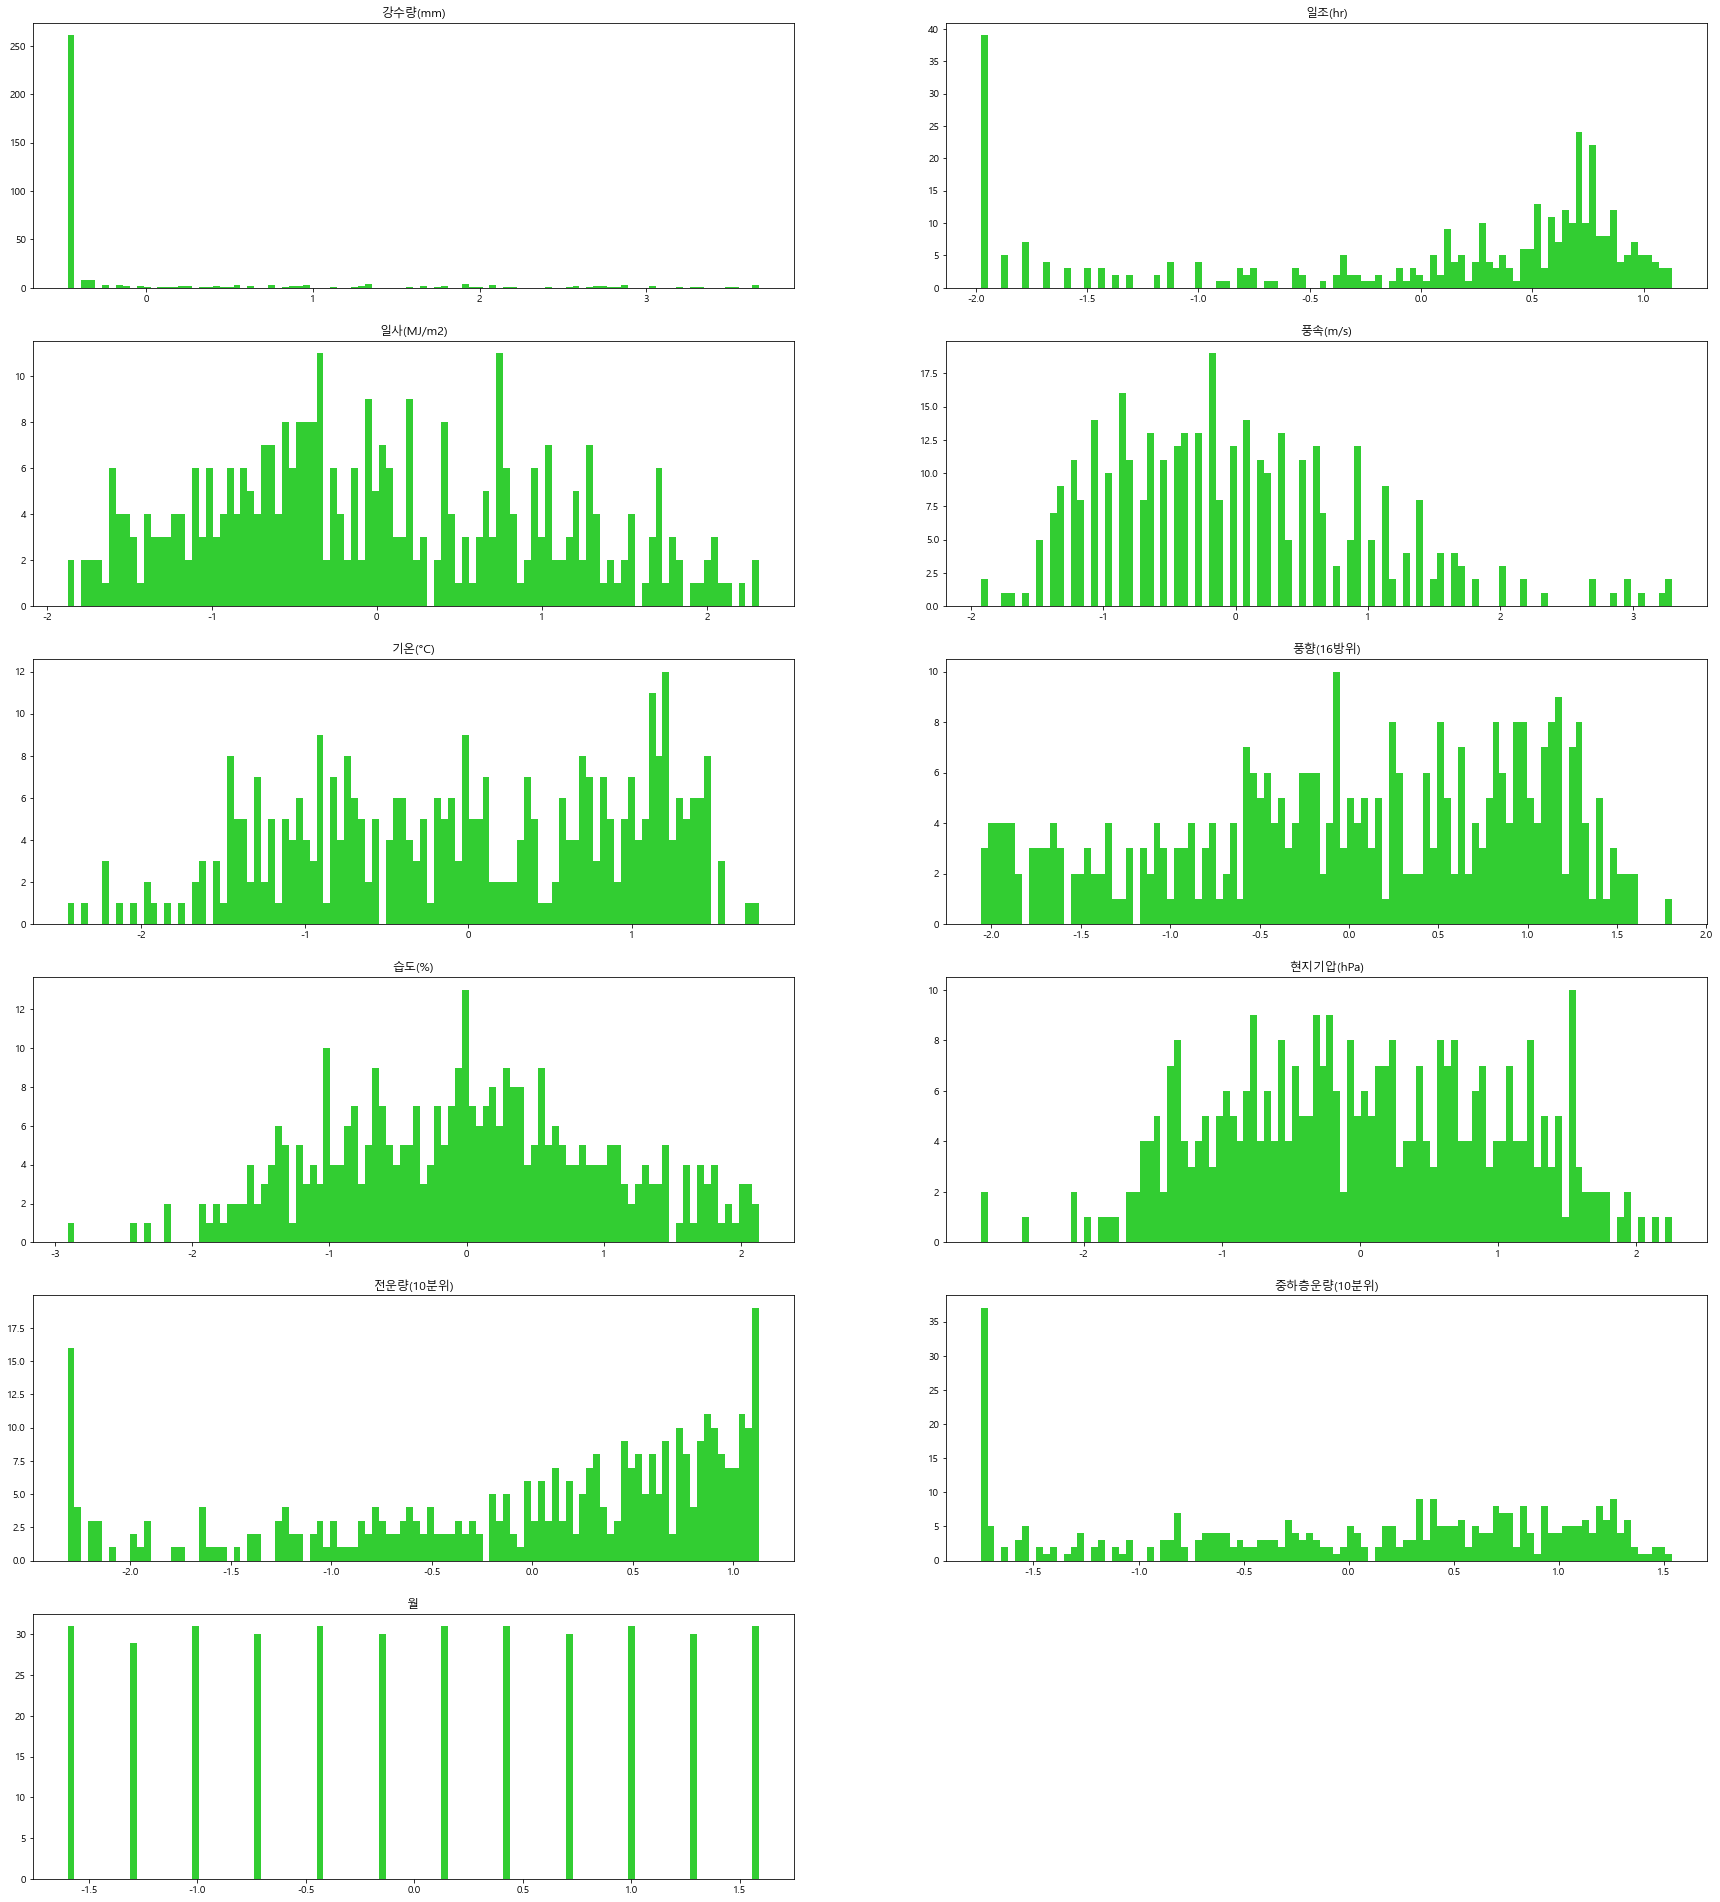

In [74]:
fig = plt.figure(figsize=(30, 40))
i = 1
for c in nomalized_daily_weather.columns :
    ax = fig.add_subplot(7, 2, i)
    i += 1
    ax.hist(nomalized_daily_weather[c], bins=100, color='limegreen')
    ax.set_title(c)
plt.show()

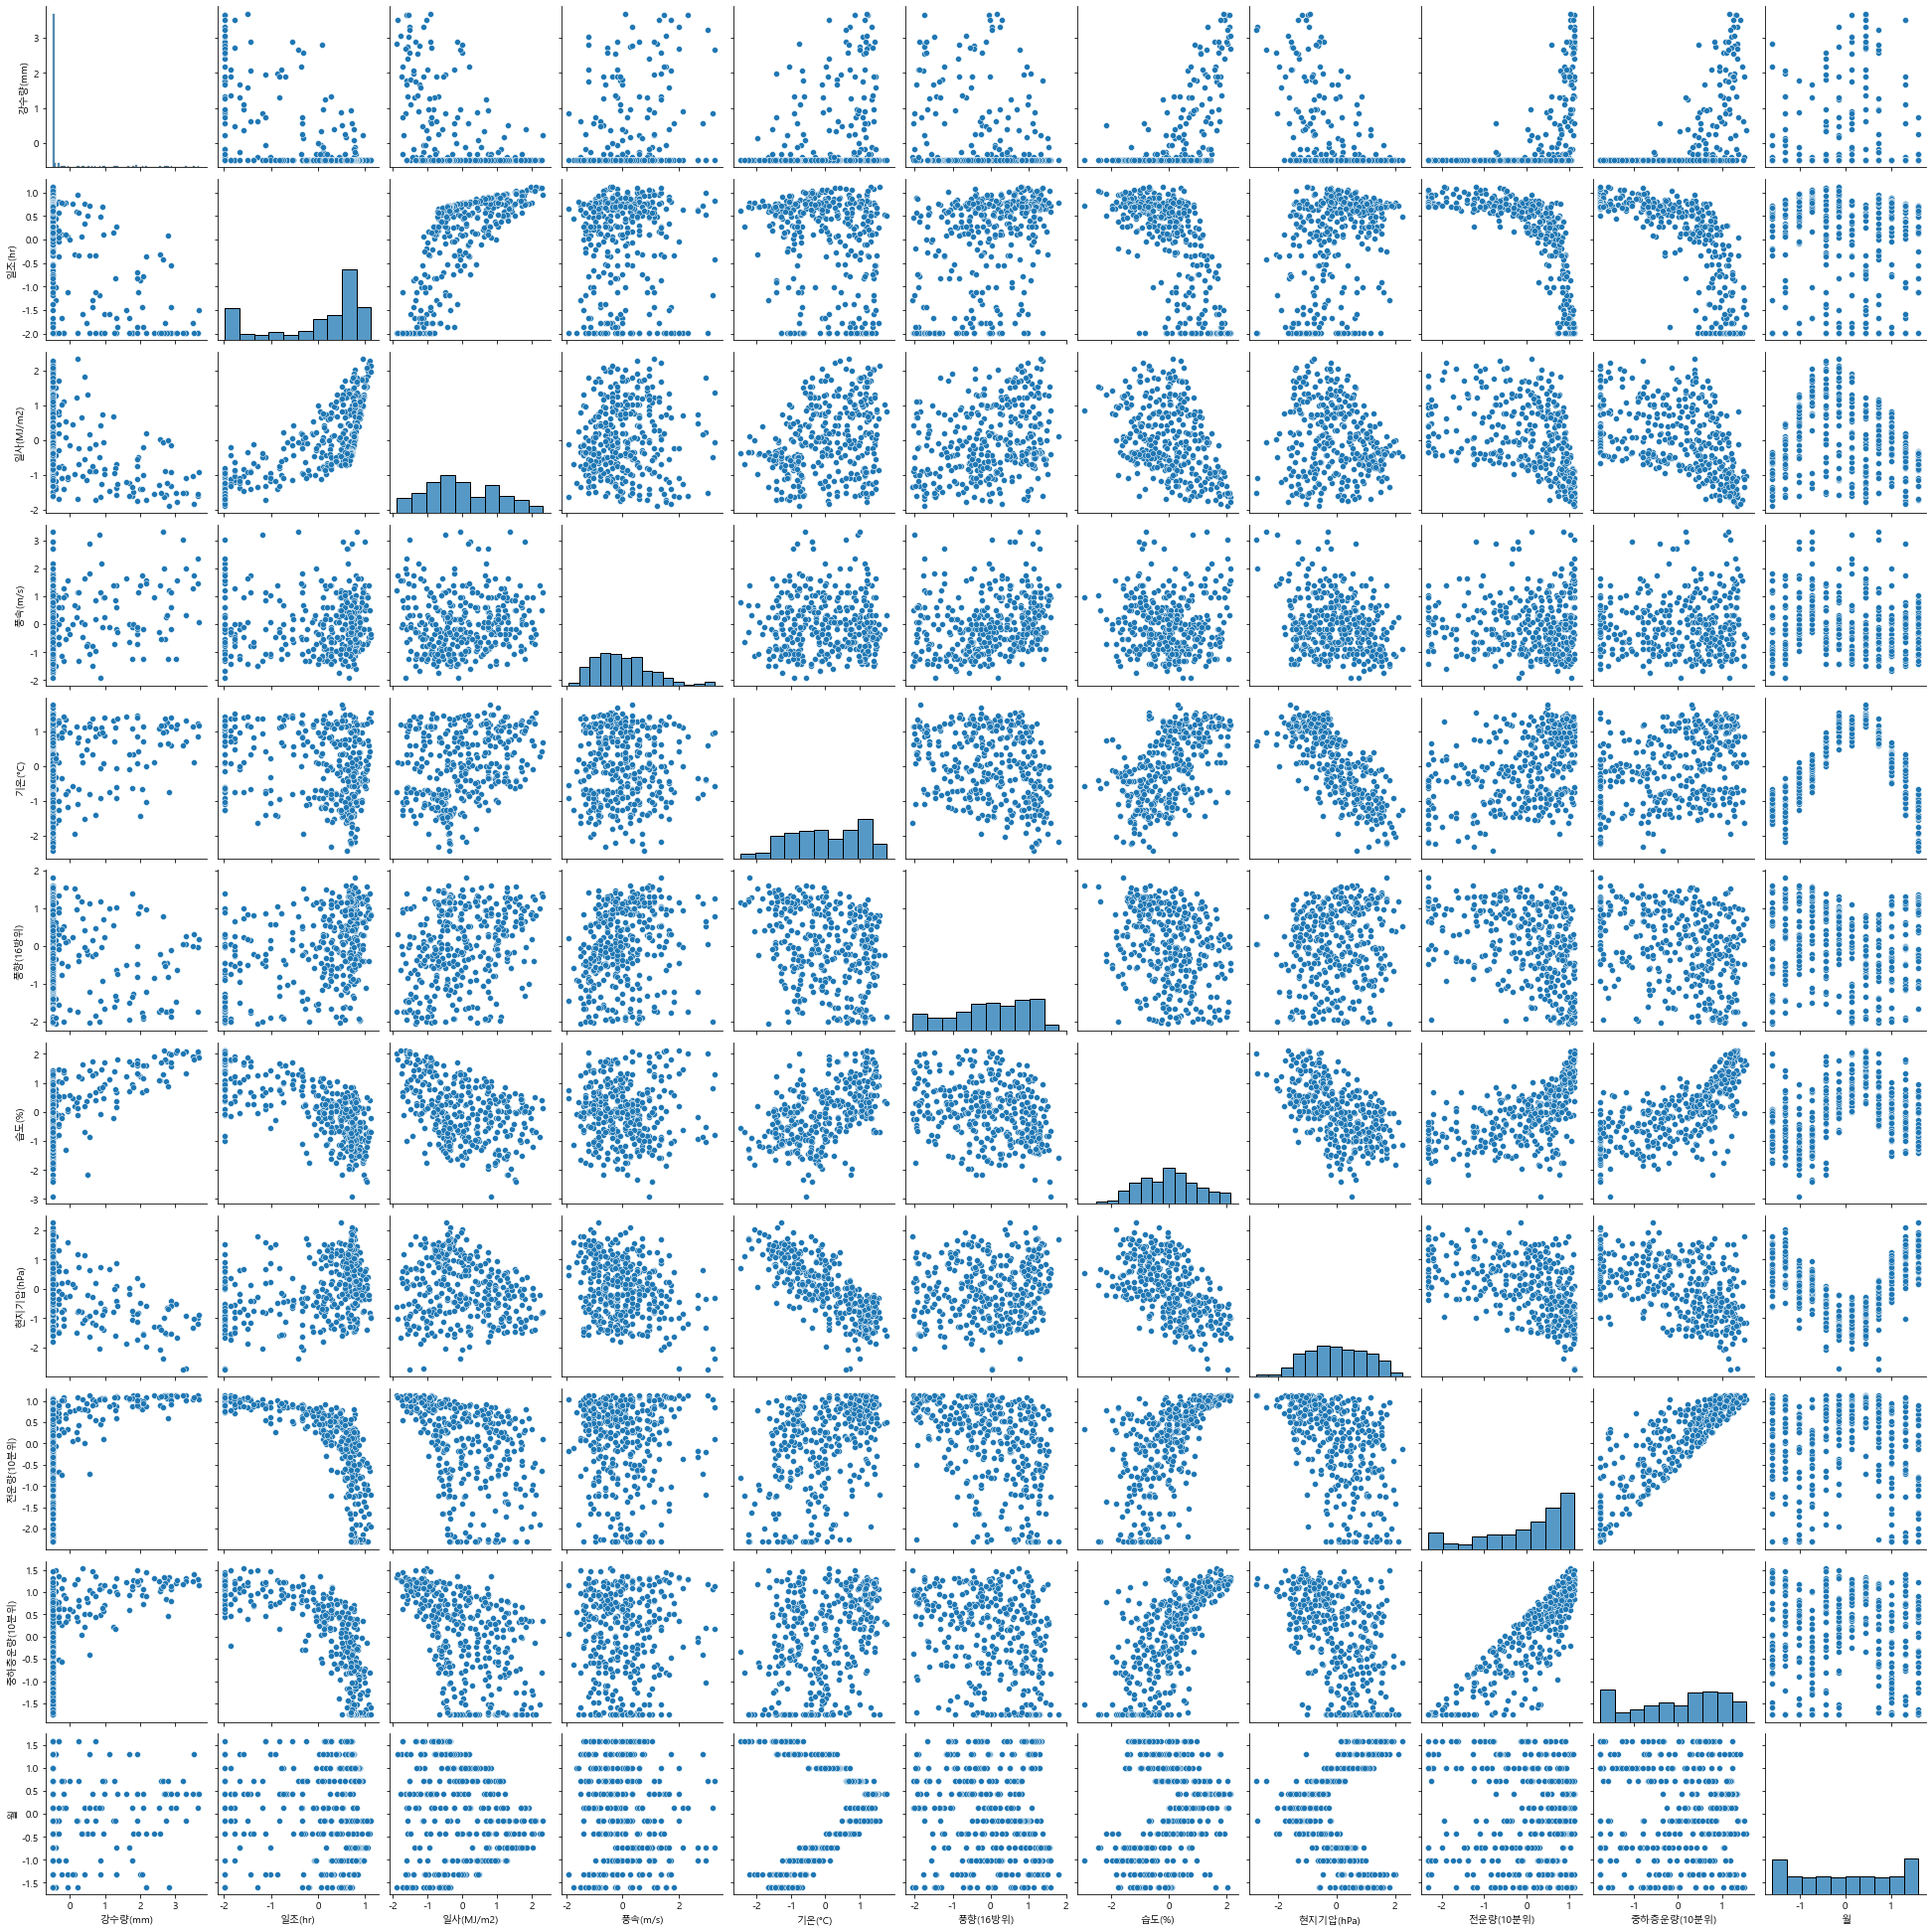

In [75]:
sns.pairplot(nomalized_daily_weather)

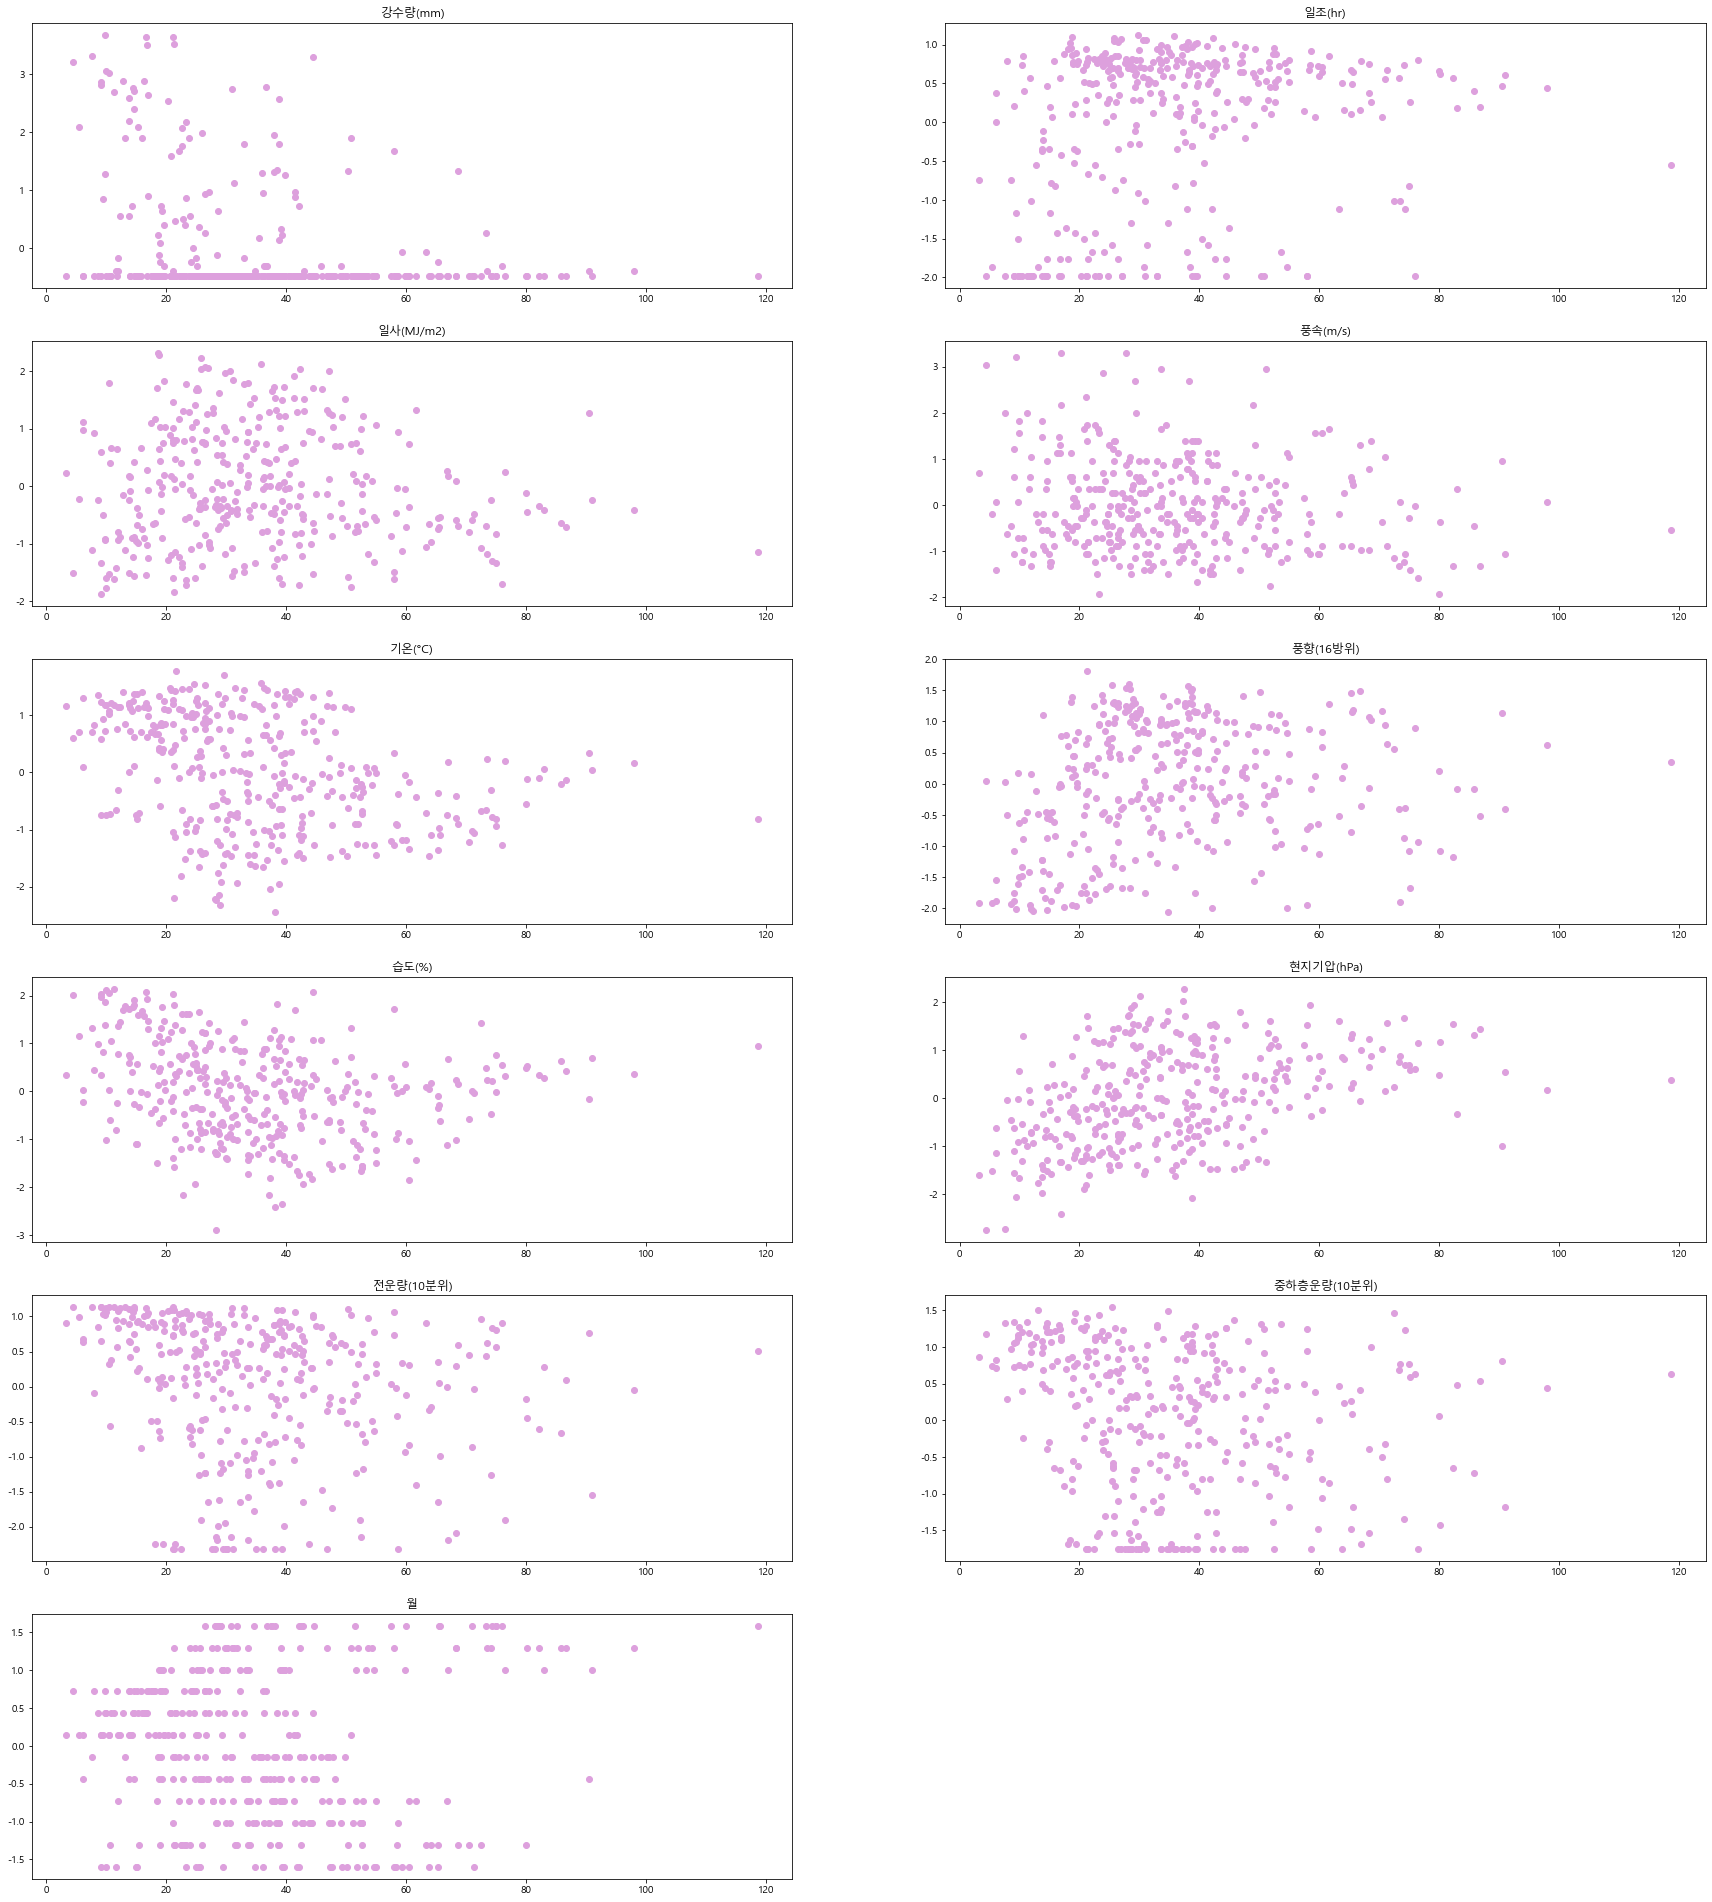

In [76]:
fig = plt.figure(figsize=(30, 40))
i = 1
for c in nomalized_daily_weather.columns :
    ax = fig.add_subplot(7, 2, i)
    i += 1
    ax.scatter(daily_air['PM10'], nomalized_daily_weather[c], color='plum')
    ax.set_title(c)
plt.show()